# Sensor Measurement Graphs 

In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math

plt.rcParams.update({
    "figure.facecolor": (1,1,1,1),
    "axes.facecolor": (1,1,1,1),
    "savefig.facecolor": (1,1,1,1)
})

from matplotlib.ticker import ScalarFormatter
import datetime

## Data Input

In [16]:
flash_data_csv = os.path.join("..", "FlightData", "Spring2025", "ASCEND_flash_data_file_4_04_03_20_02_43.csv")

full_flash_df = pd.read_csv(flash_data_csv)
custom_na = pd._libs.parsers.STR_NA_VALUES
custom_na.add("-")

row = 3
count = 1 
for col in (list(full_flash_df.columns)):
    print(f"'{col}'".ljust(25), end="")
    if(count % row == 0): print()
    count += 1


'Millis'                 'PCF8523 Year'           'PCF8523 Month'          
'PCF8523 Day'            'PCF8523 Hour'           'PCF8523 Minute'         
'PCF8523 Second'         'INA260 Current (mA)'    'INA260 Voltage (mV)'    
'INA260 Power (mW)'      'PicoTemp Temp (C)'      'ICM20948 AccX (g)'      
'ICM20948 AccY (g)'      'ICM20948 AccZ (g)'      'ICM20948 GyroX (deg/s)' 
'ICM20948 GyroY (deg/s)' 'ICM20948 GyroZ (deg/s)' 'ICM20948 MagX (uT)'     
'ICM20948 MagY (uT)'     'ICM20948 MagZ (uT)'     'ICM20948 Temp (C)'      
'MTK3339 Year'           'MTK3339 Month'          'MTK3339 Day'            
'MTK3339 Hour'           'MTK3339 Minute'         'MTK3339 Second'         
'MTK3339 Latitude'       'MTK3339 Longitude'      'MTK3339 Speed'          
'MTK3339 Heading'        'MTK3339 Altitude'       'MTK3339 Satellites'     
'BMP390 Temp (C)'        'BMP390 Pressure (Pa)'   'BMP390 Altitude (m)'    
'TMP117 Temp (C)'        'SHTC3 Temp (C)'         'SHTC3 Rel Hum (%)'      
'SCD40 CO2 C

## Data Output 

In [3]:
os.makedirs("EnvironmentalMeasurementGraphs", exist_ok=True)

## Initial Processing

In [4]:
full_flash_df["Minutes"] = full_flash_df["Millis"] / 1000 / 60 
full_flash_df["GPS Alt km"] = full_flash_df["MTK3339 Altitude"] / 1000 / 1000

# trim after landing 
flash_df = full_flash_df[full_flash_df["Minutes"] < 105]


In [5]:
# including layer calculations from previous analysis 
tropopause_start = 36_214 * 0.0003048 # km 
tropopause_end = 56_101 * 0.0003048 # km

troposphere_color = "blue"
tropopause_color = "lightblue"
stratosphere_color = "skyblue" 

def addShaders(ax, legend):
    left, right = ax.get_xlim()
    bottom, top = ax.get_ylim()
        
    # troposphere
    troposphere_fill = ax.fill([left, left, right, right], 
            [bottom, tropopause_start, tropopause_start, bottom], 
            alpha=0.2, 
            label="Troposphere", 
            color=troposphere_color)
    legend[0] += troposphere_fill
    legend[1].append(troposphere_fill[0].get_label())
    
    # tropopause
    tropopause_fill = ax.fill([left, left, right, right], 
            [tropopause_start, tropopause_end, tropopause_end, tropopause_start], 
            alpha=0.2, 
            label="Tropopause", 
            color=tropopause_color) 
    legend[0] += tropopause_fill
    legend[1].append(tropopause_fill[0].get_label())
    
    # stratosphere
    stratosphere_fill = ax.fill([left, left, right, right], 
            [tropopause_end, top, top, tropopause_end], 
            alpha=0.2, 
            label="Troposphere", 
            color=stratosphere_color)
    legend[0] += stratosphere_fill
    legend[1].append(stratosphere_fill[0].get_label())


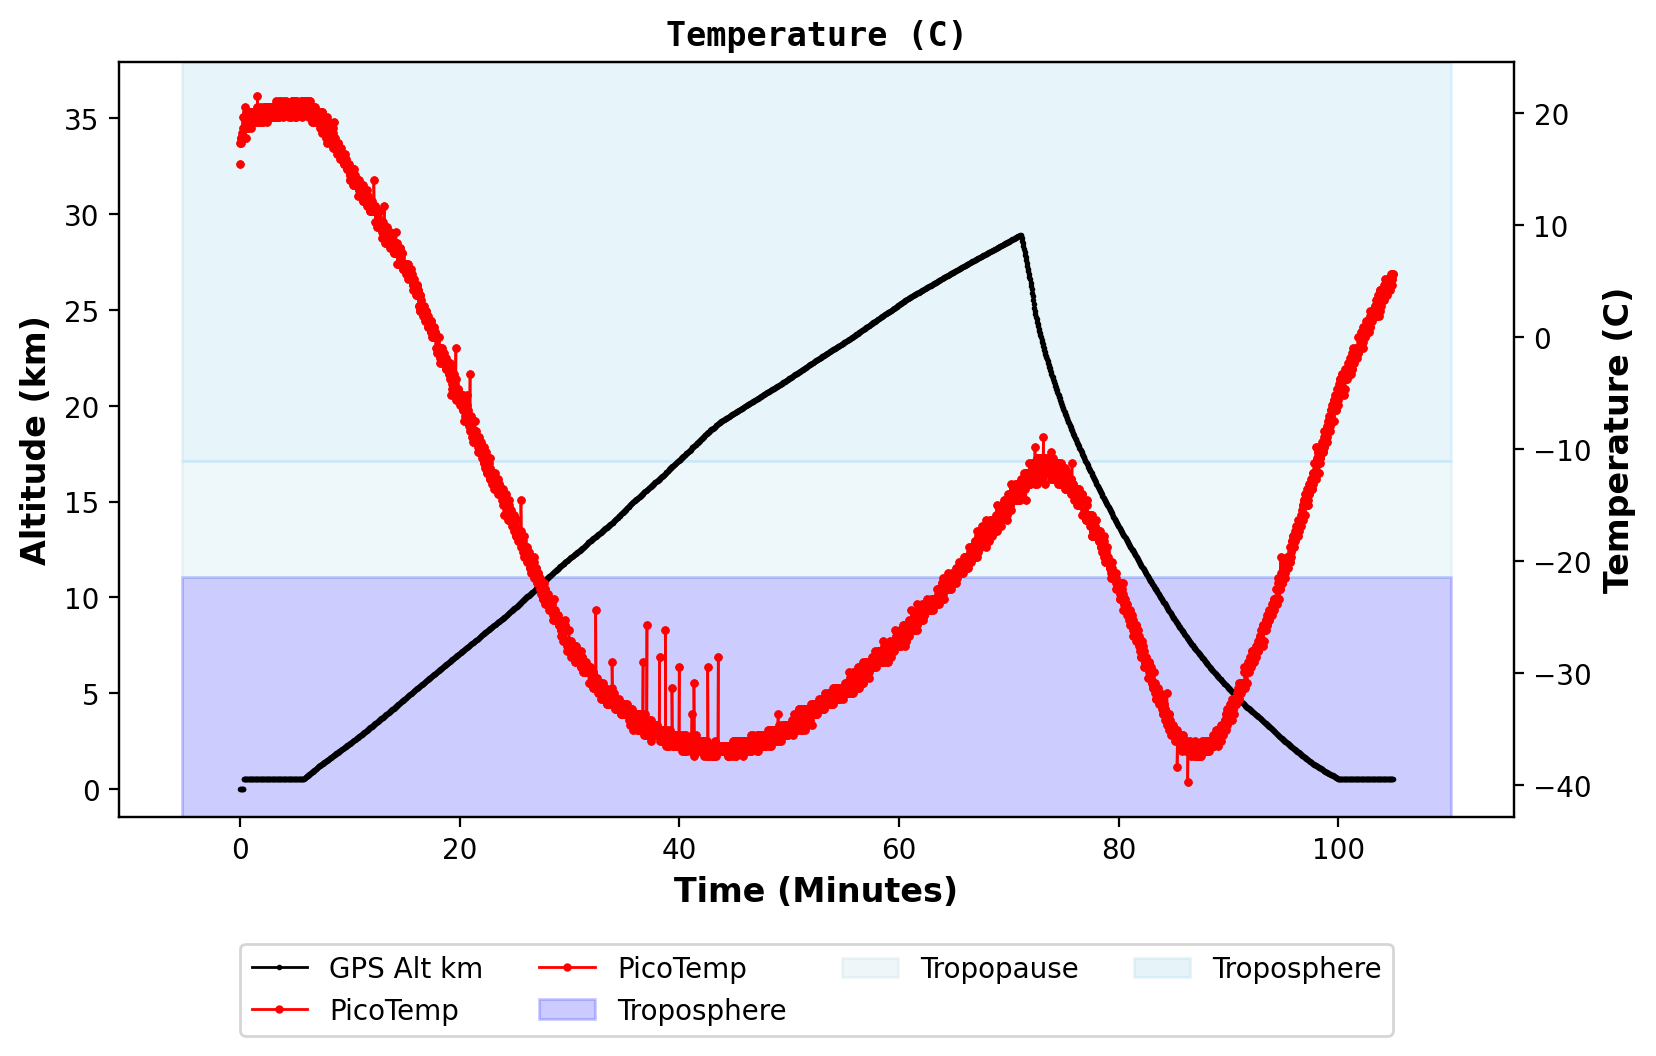

In [6]:
# target with format (unit, [(display name, column name), ...])
def plotVsTimeWithAltOverlay(df, targets):
    alt_col = "GPS Alt km"
    time_col = "Minutes"
    
    fig, ax = plt.subplots(dpi = 200)
    fig.set_figwidth(9)
    fig.set_figheight(5)
    
    plot_title = f"{targets[0]}"
    plt.title(plot_title, fontsize="large", loc="center", fontweight="bold", family="monospace")

    ax.set_xlabel(f"Time (Minutes)", fontsize="large", fontweight="bold")
    ax.set_ylabel(f"Altitude (km)", fontsize="large", fontweight="bold")    
    
    line1 = plt.plot(time_col, alt_col, data=df, marker='o', markersize=1, color="black", linewidth=1)    

    ax2 = ax.twinx()
    ax2.set_ylabel(targets[0], fontsize="large", fontweight="bold")
    
    legendObj = line1 
    legendLabels = [line1[0].get_label()]
    
    for target in targets[1]:
        if(target[1] not in df.columns):
            print(f"ERROR: {target[1]} is not a valid column")
            return 
        target_line = plt.plot(time_col, 
                               target[1], 
                               data=df,
                               label=target[0],
                               **target[2],
                              )
        
        legendObj += target_line 
        legendLabels.append(target_line[0].get_label())
        
    ax.set_ylim([None, ax.get_ylim()[1] * 1.25])
    
#     legendObj =  line2 + line1
#     legendLabels = [line2[0].get_label(), line1[0].get_label()]
    
    addShaders(ax, [legendObj, legendLabels])
    
    ax.legend(legendObj, legendLabels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
    
    plt.show()
    
typical_config = {
    "marker": "o",
   "markersize": 2,
   "linewidth": 1,
}

plotVsTimeWithAltOverlay(
    flash_df, 
    ("Temperature (C)", [
        ("PicoTemp", "PicoTemp Temp (C)", {"color": "red", **typical_config}),
        ("PicoTemp", "PicoTemp Temp (C)", {"color": "red", **typical_config}),
    ])
)


# Temperature

External Sensors


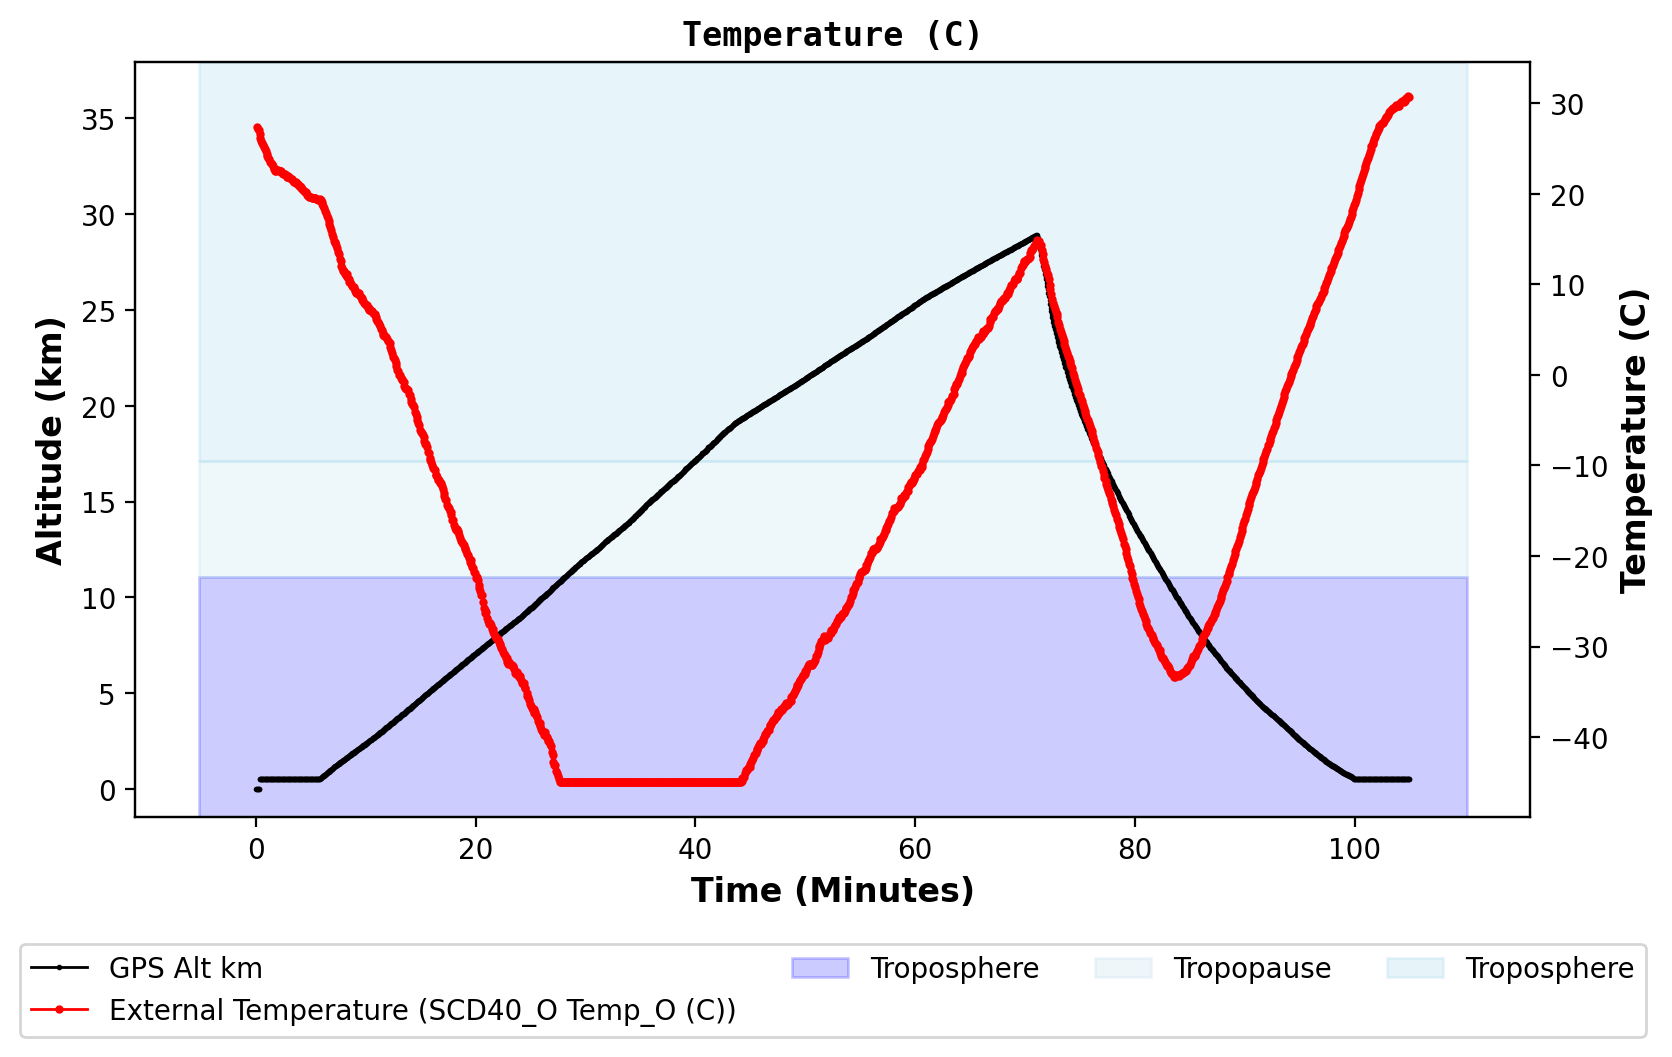

Min: -45.0 Max: 30.76791000366211


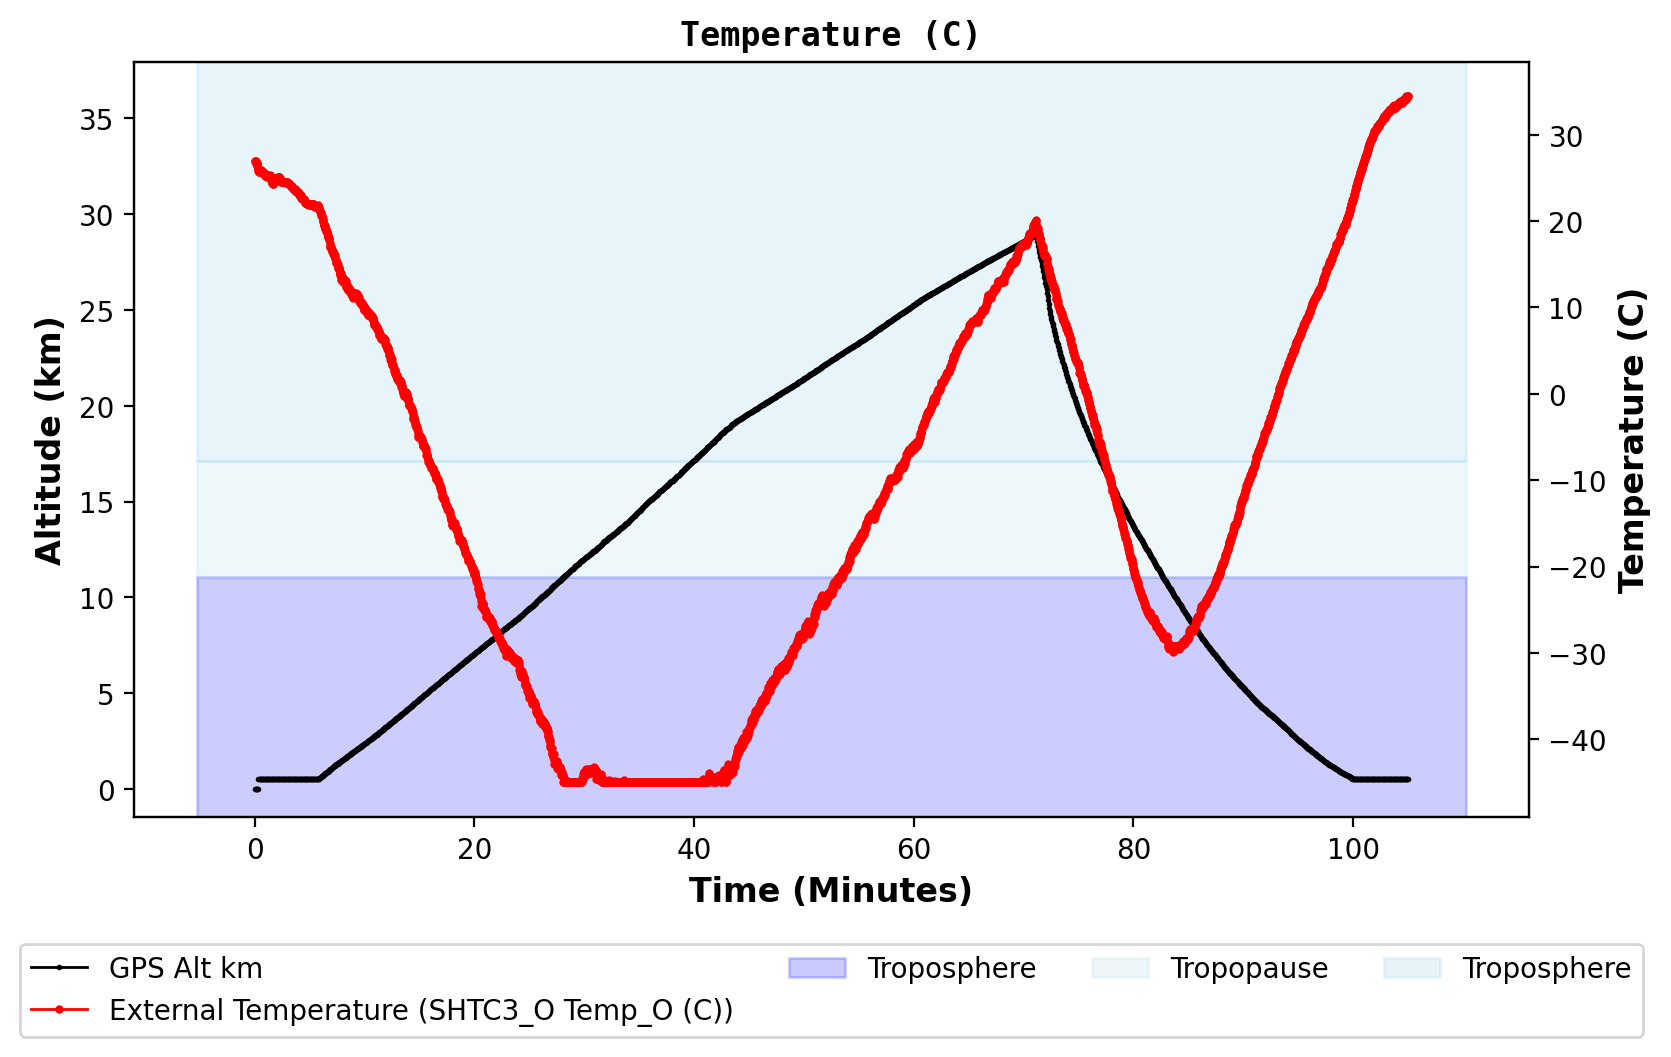

Min: -45.0 Max: 34.470001220703125


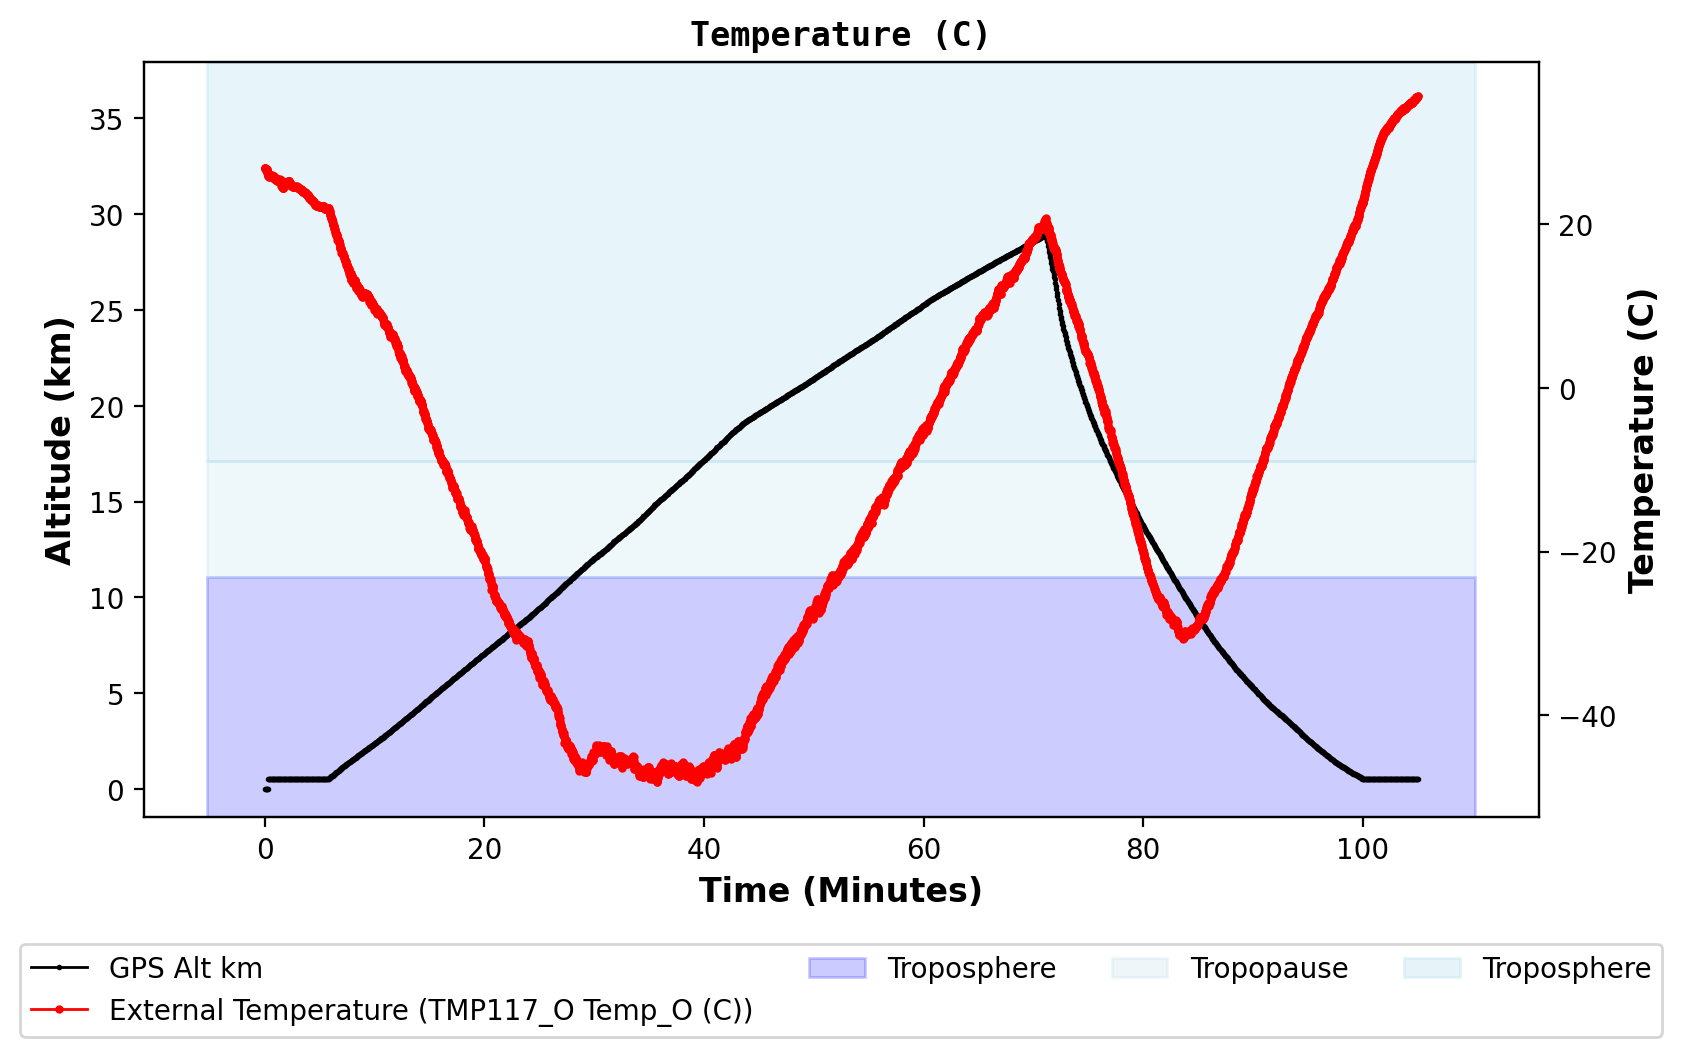

Min: -48.1875 Max: 35.6171875
Internal Sensors


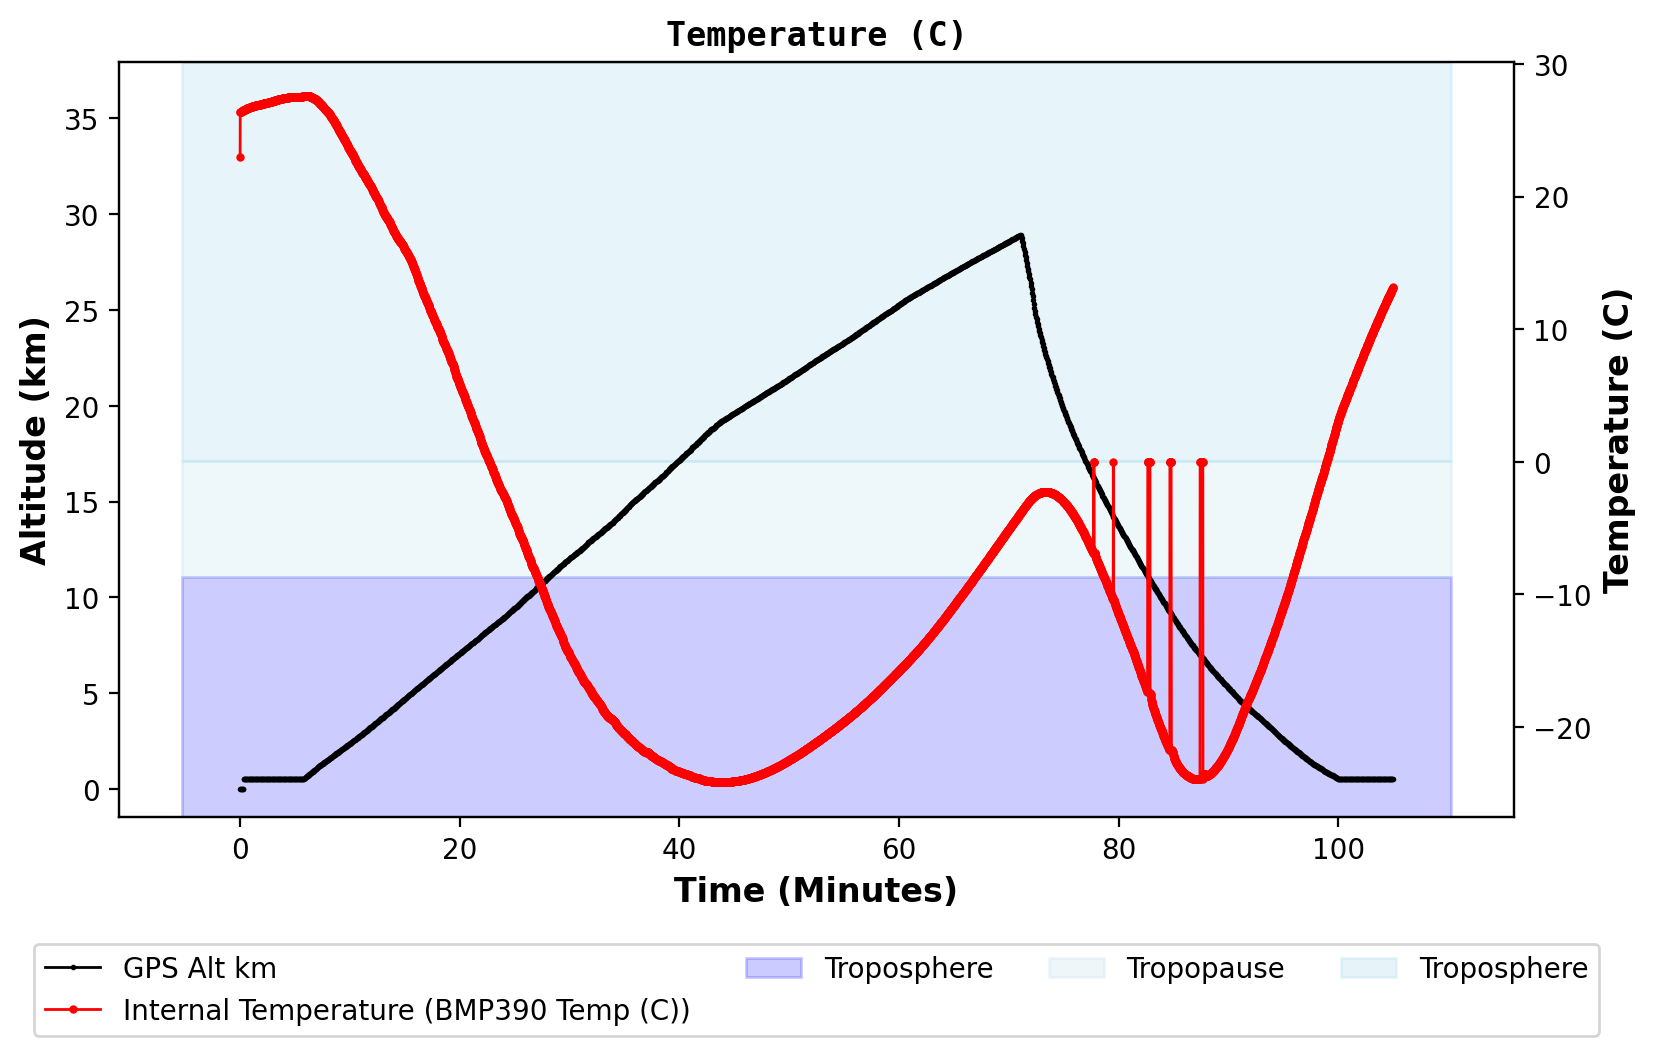

Min: -24.18368698687021 Max: 27.573895793904526


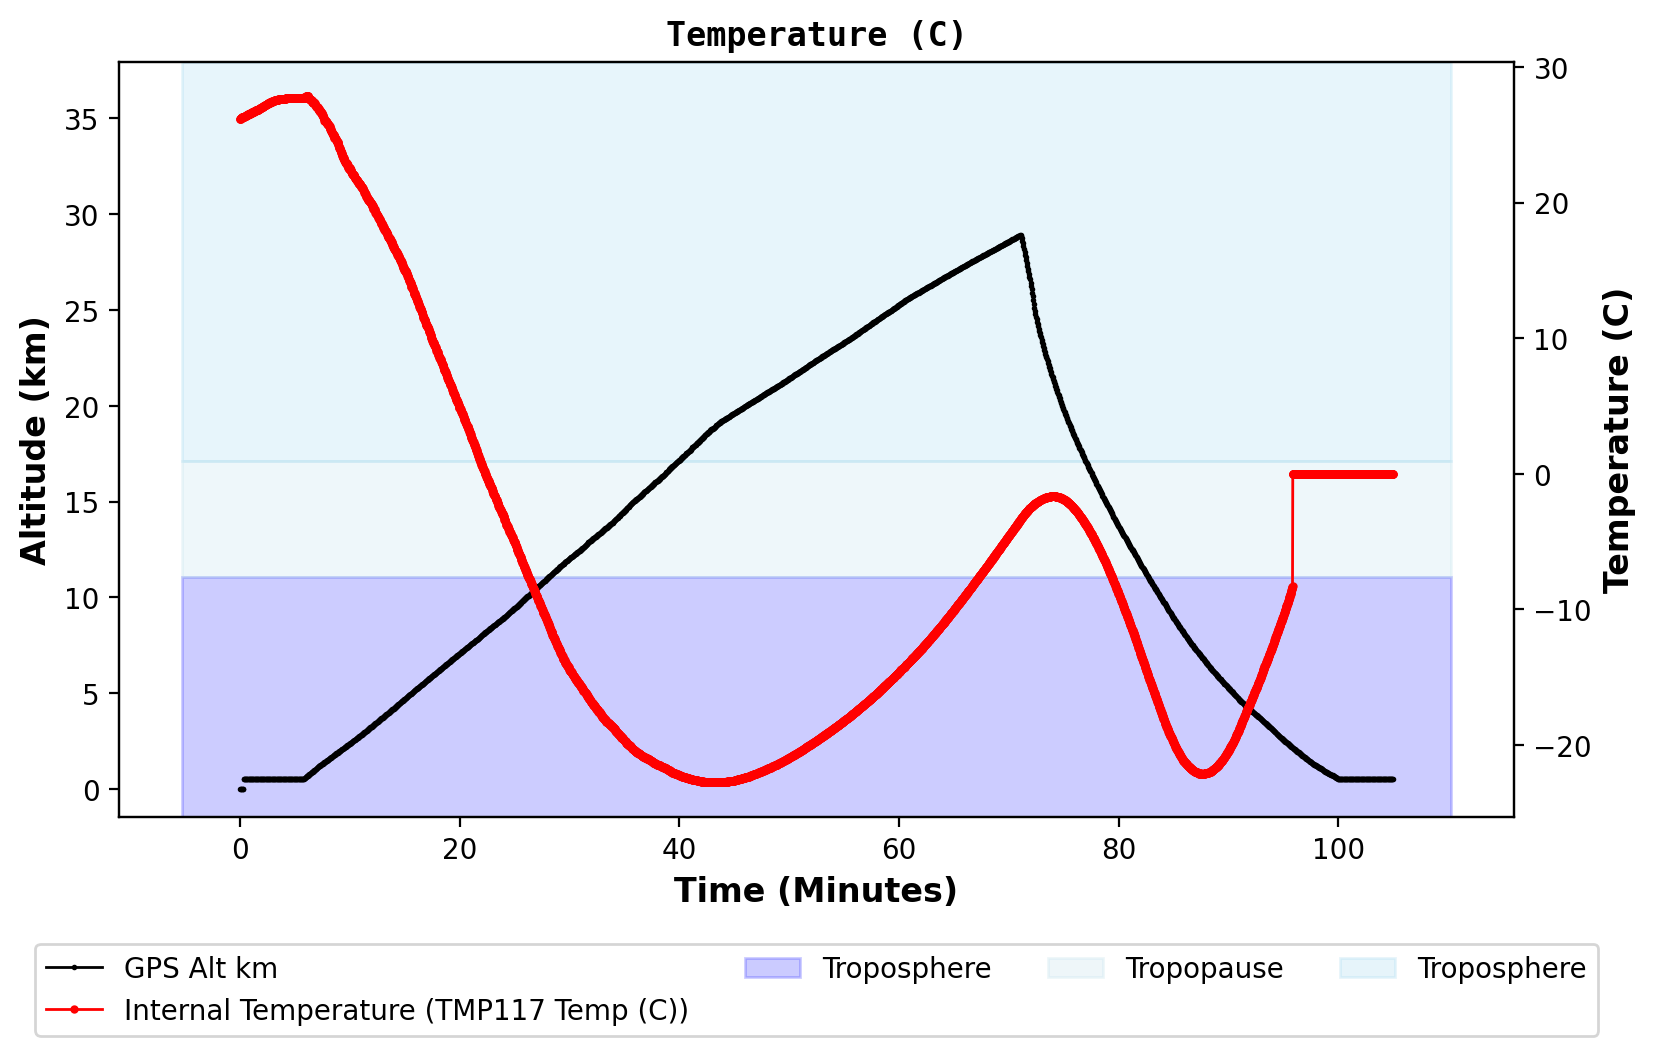

Min: -22.7890625 Max: 27.859375


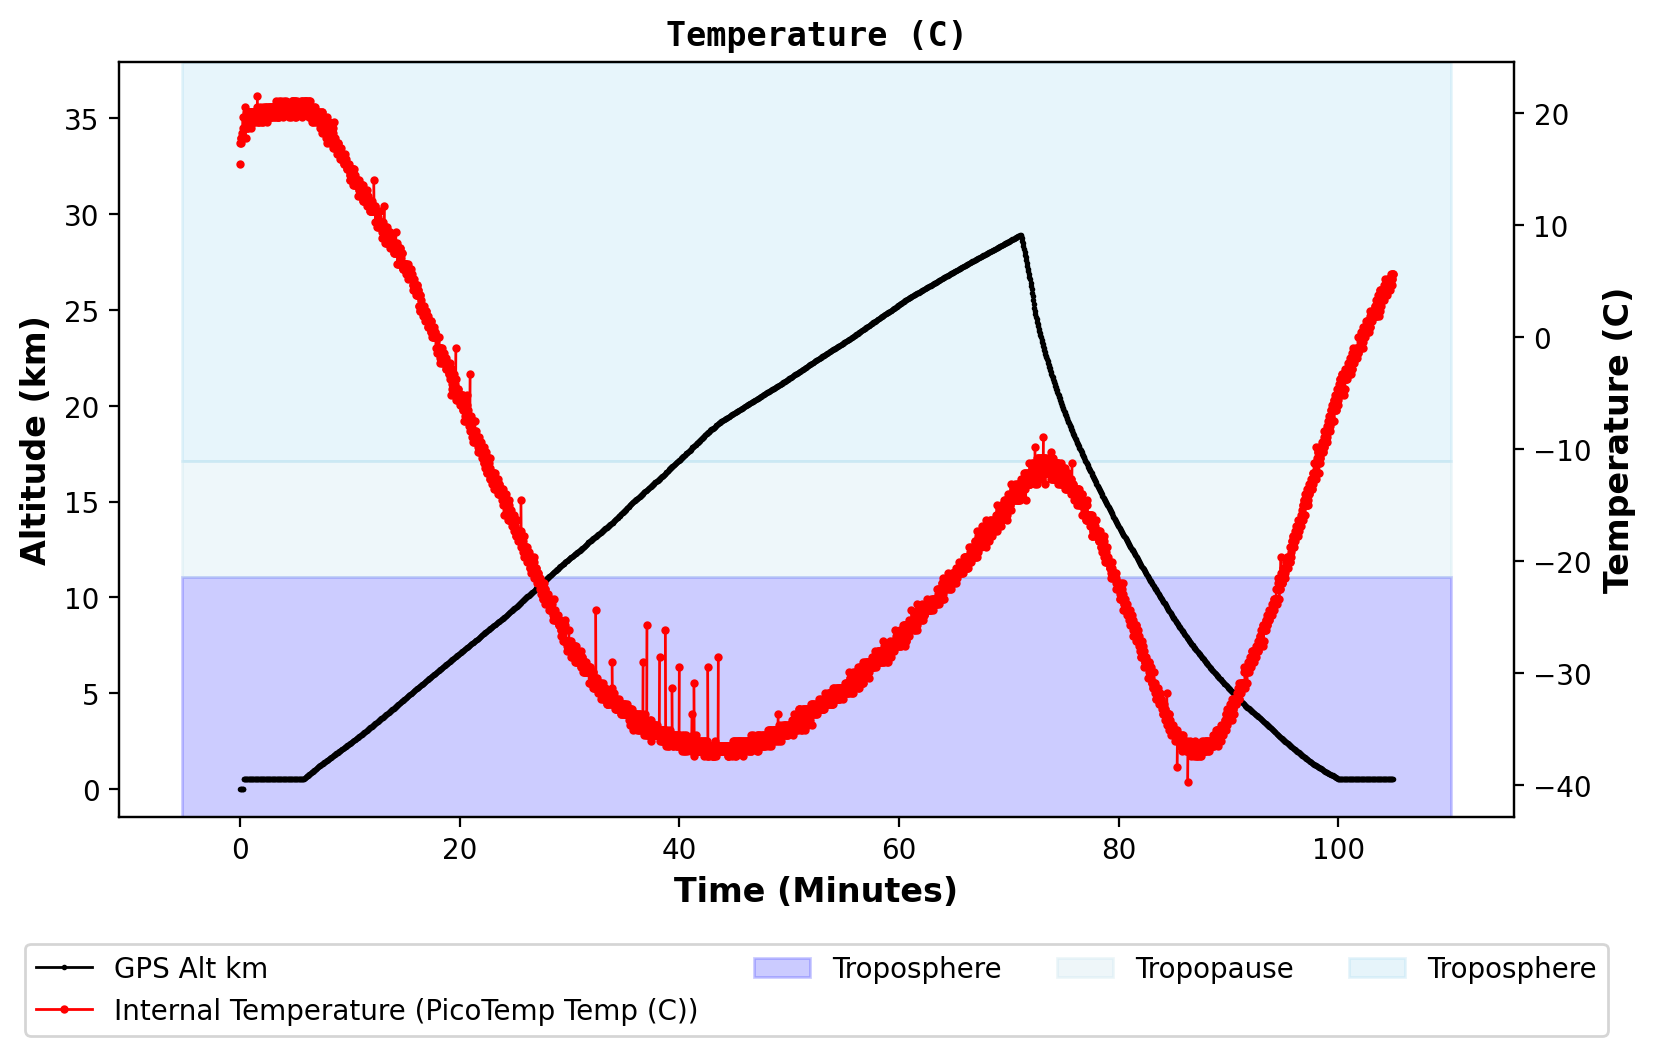

Min: -39.80516815185547 Max: 21.52080535888672


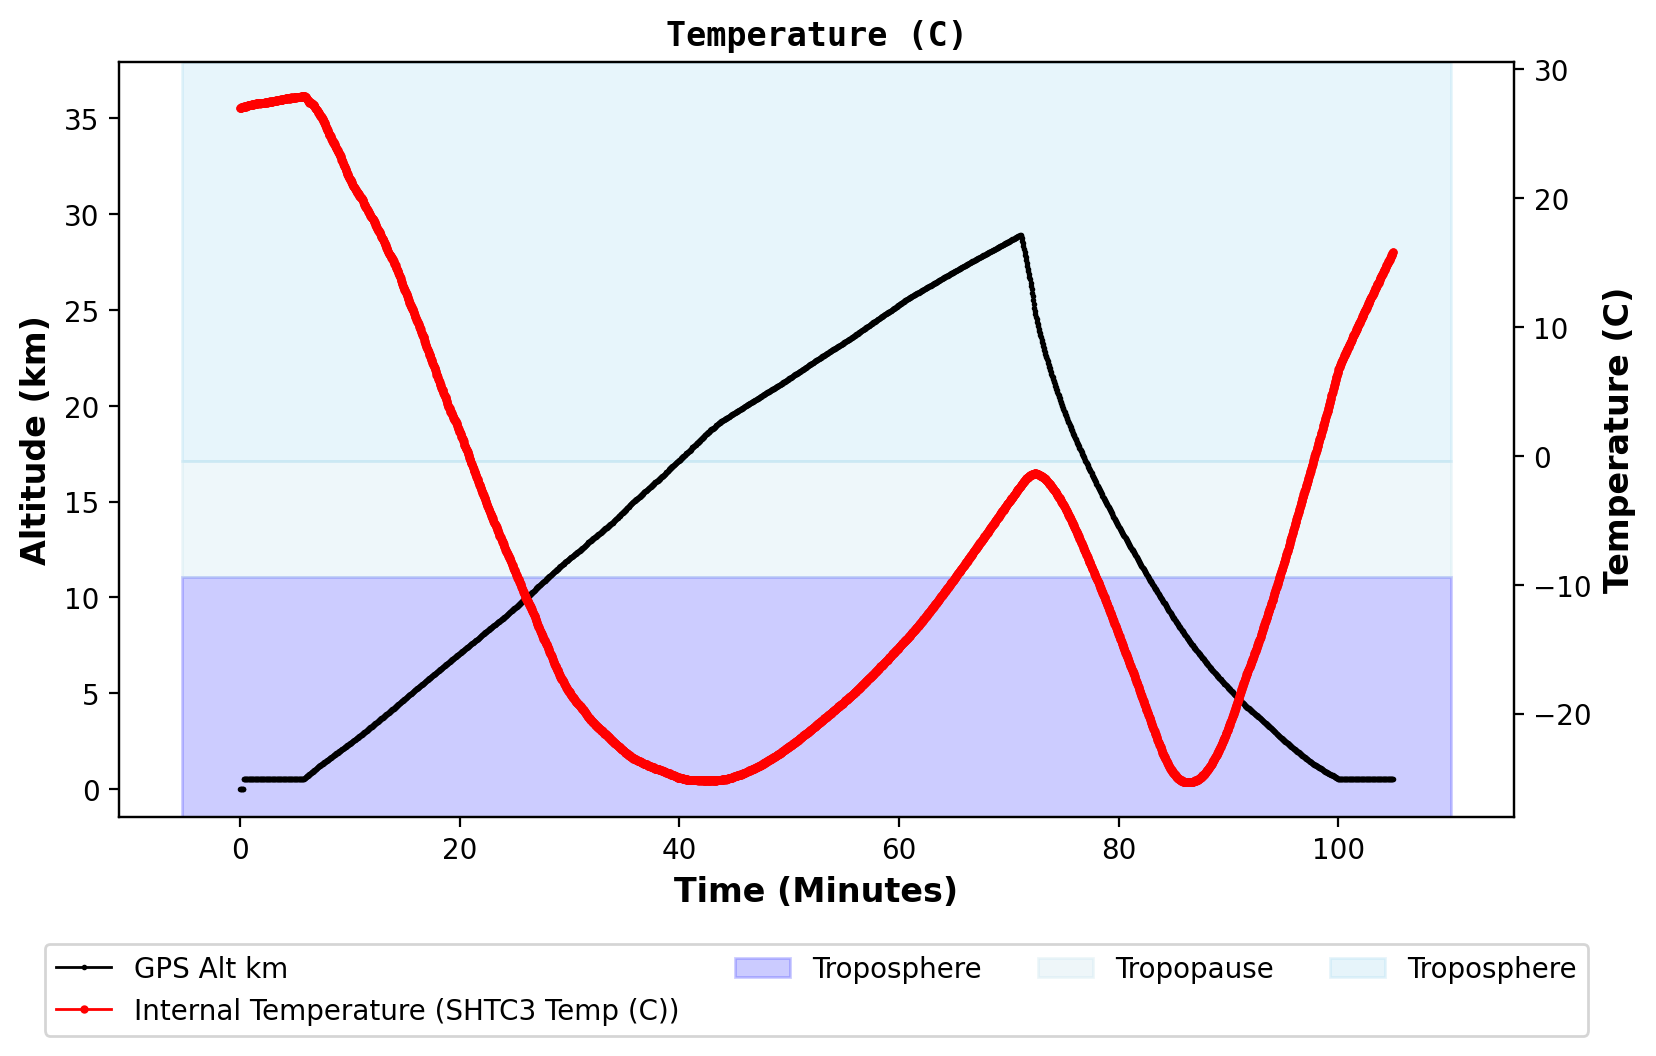

Min: -25.34000015258789 Max: 27.8799991607666


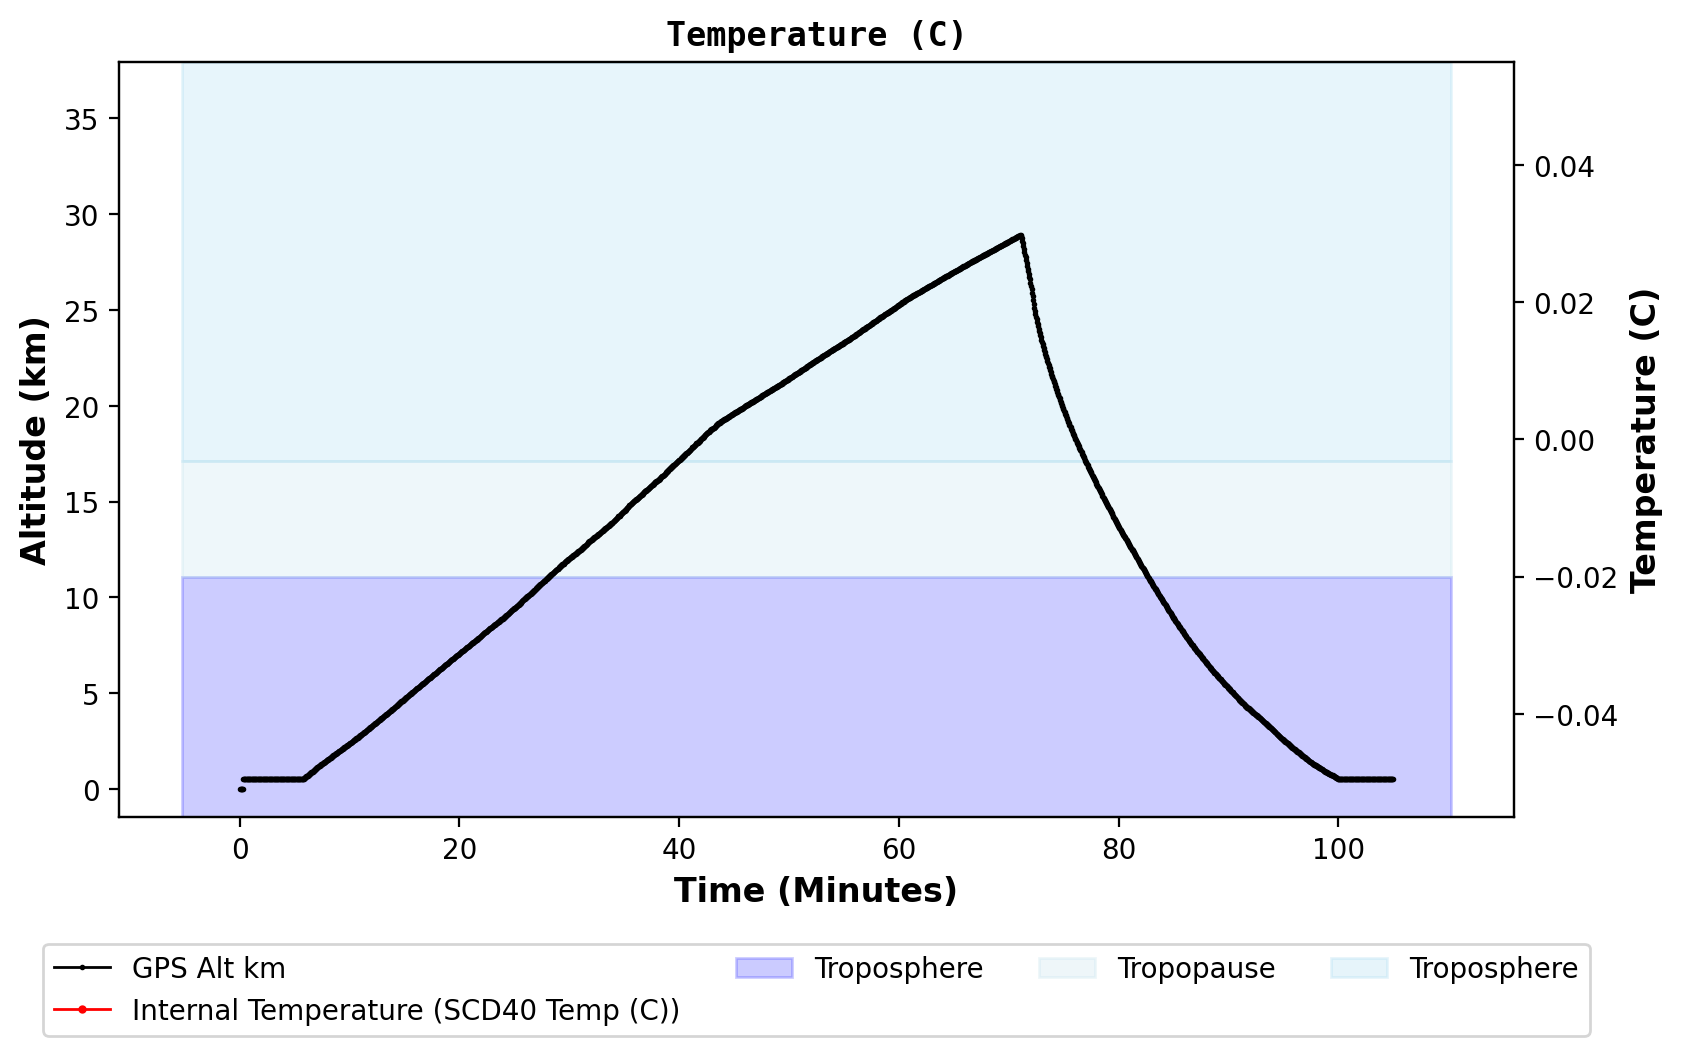

Min: nan Max: nan


In [7]:
# internal sensors
internal_temps = [
    "BMP390 Temp (C)",
    "TMP117 Temp (C)",
    "PicoTemp Temp (C)",
    "SHTC3 Temp (C)", 
    "SCD40 Temp (C)", 
]

# external sensors 
external_temps = [
    "SCD40_O Temp_O (C)",
    "SHTC3_O Temp_O (C)",
    "TMP117_O Temp_O (C)"
]

print("External Sensors")
for temp in external_temps: 
    plotVsTimeWithAltOverlay(
        flash_df, 
        ("Temperature (C)", [
            (f"External Temperature ({temp})", temp, {"color": "red", **typical_config}),
        ])
    )
    print(f"Min: {flash_df[temp].min()} Max: {flash_df[temp].max()}")

print("Internal Sensors")
for temp in internal_temps: 
    plotVsTimeWithAltOverlay(
        flash_df, 
        ("Temperature (C)", [
            (f"Internal Temperature ({temp})", temp, {"color": "red", **typical_config}),
        ])
    )
    print(f"Min: {flash_df[temp].min()} Max: {flash_df[temp].max()}")
    

## TMP117 Internal vs External 

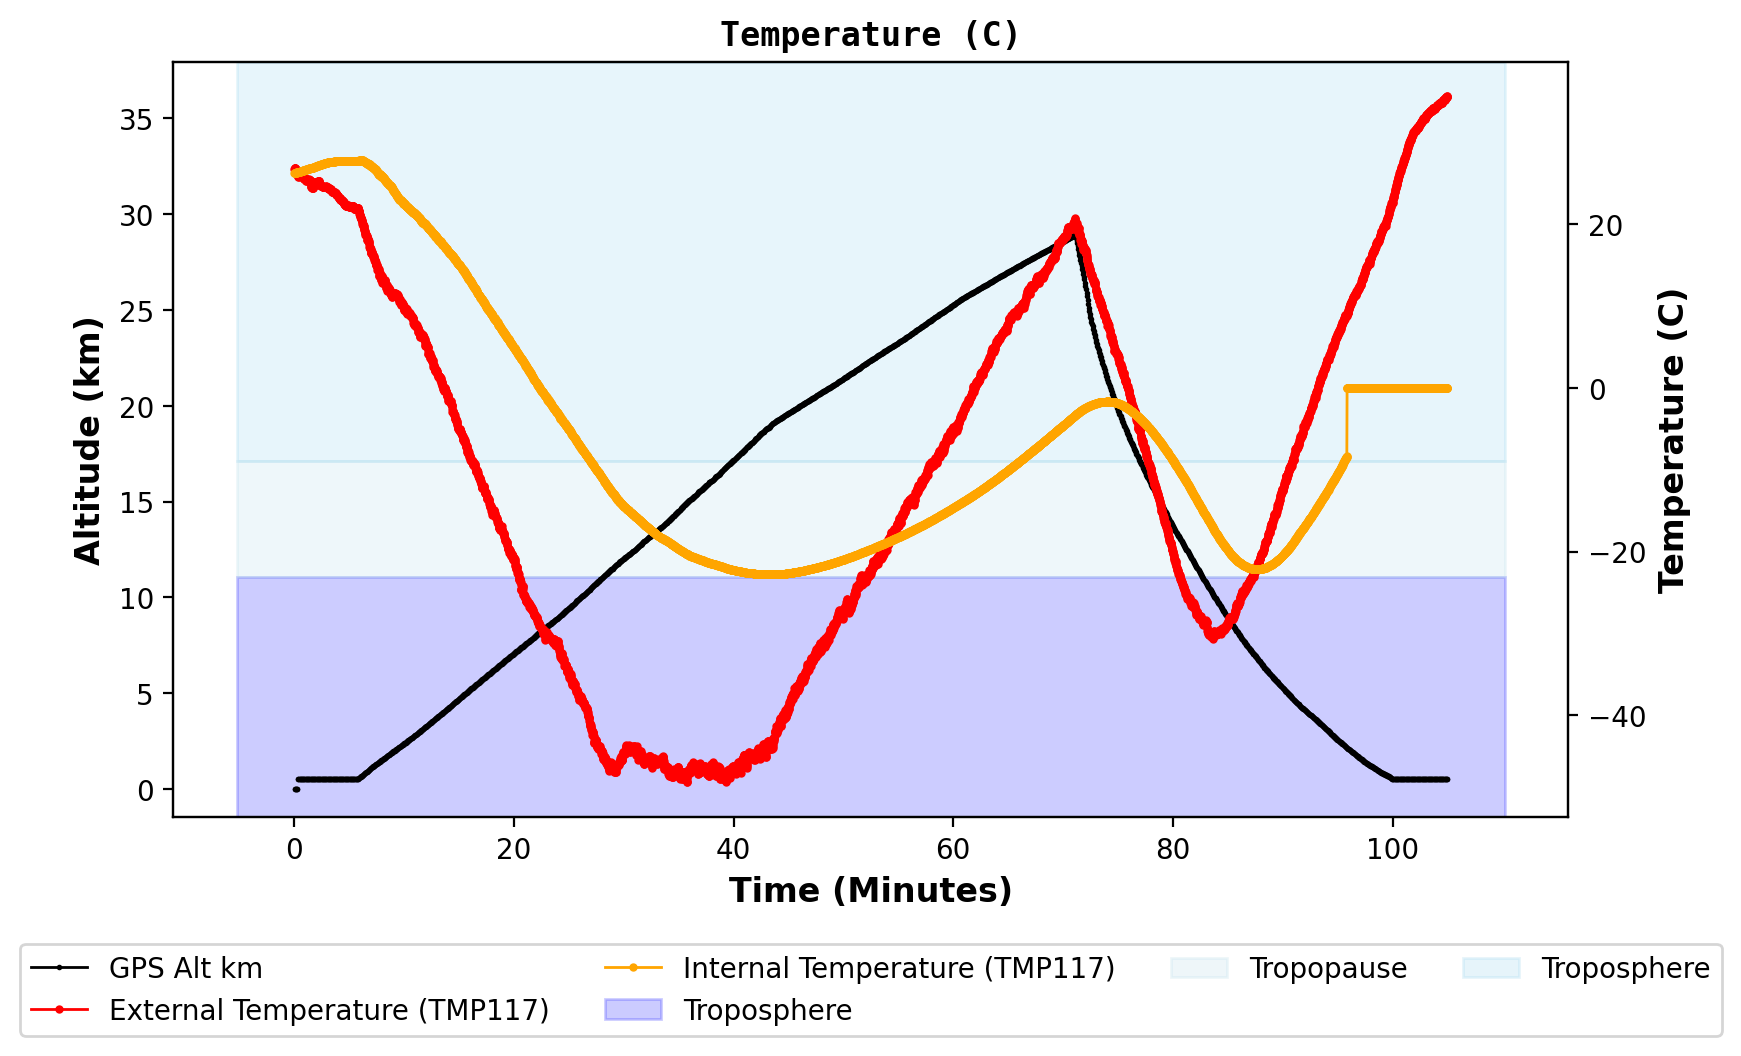

In [8]:
plotVsTimeWithAltOverlay(
        flash_df, 
        ("Temperature (C)", [
            (f"External Temperature (TMP117)", "TMP117_O Temp_O (C)", {"color": "red", **typical_config}),
            (f"Internal Temperature (TMP117)", "TMP117 Temp (C)", {"color": "orange", **typical_config}),
        ])
    )

## Internal (SHTC3) vs External (TMP117)

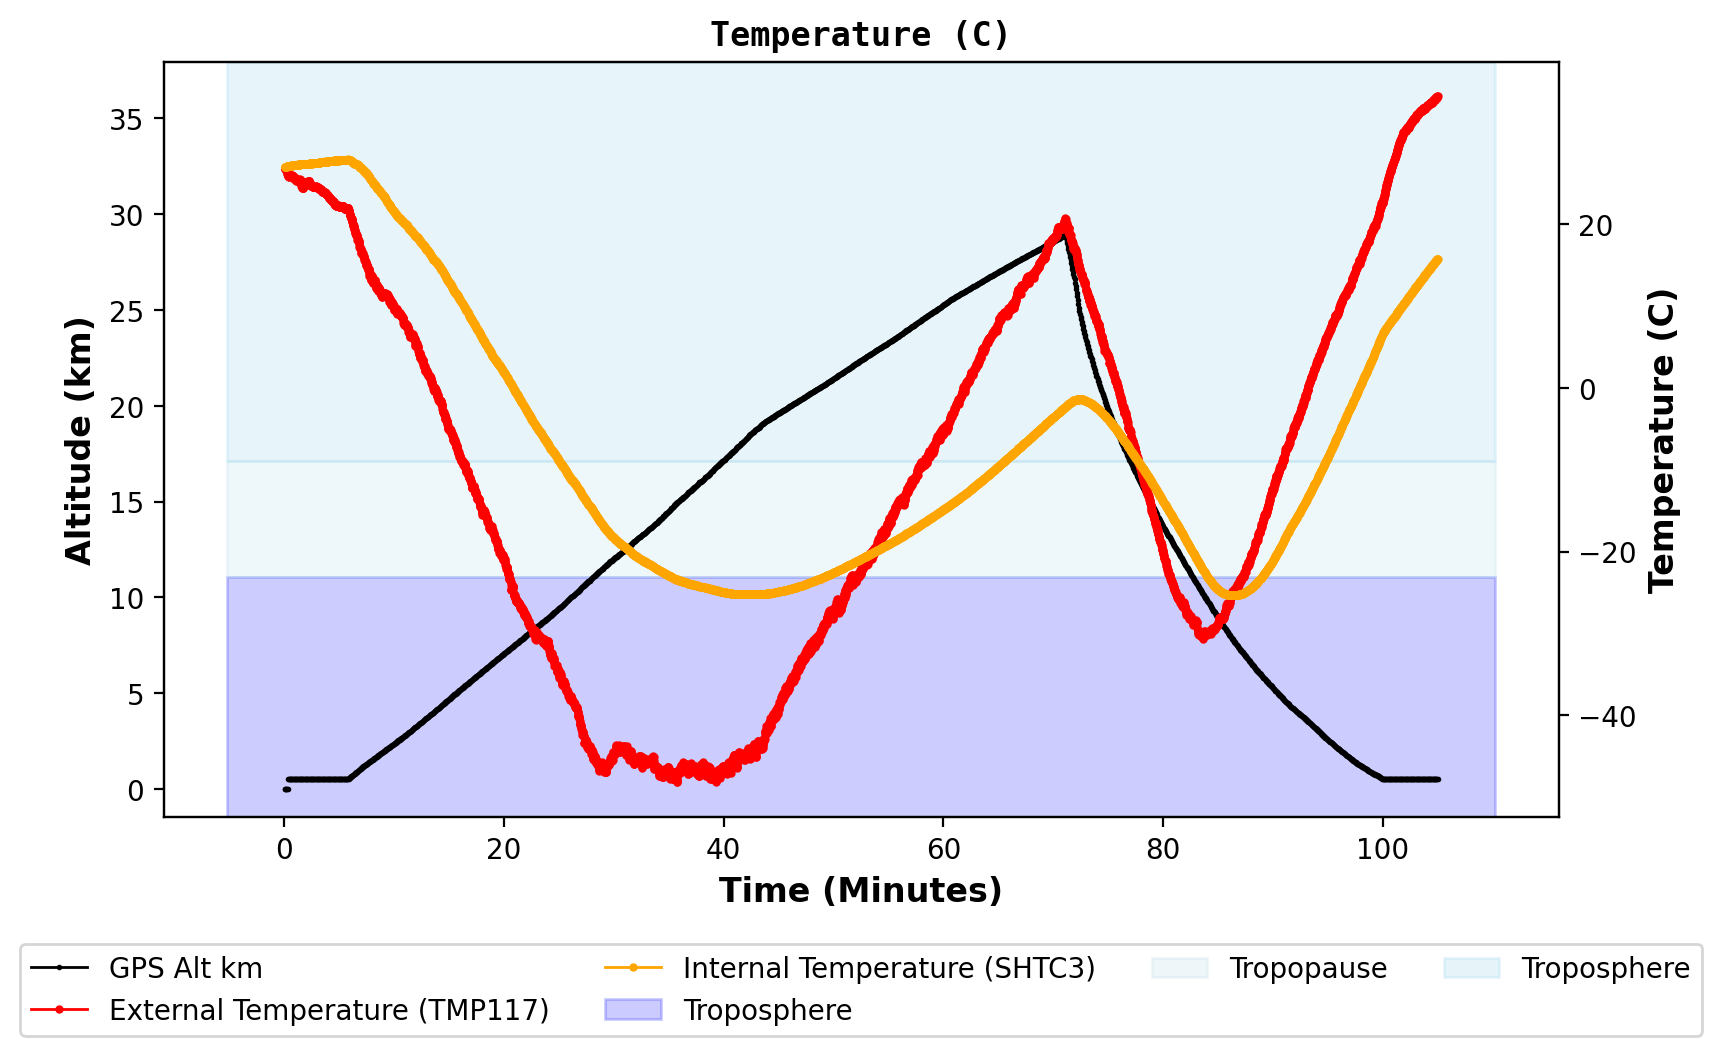

In [9]:
plotVsTimeWithAltOverlay(
        flash_df, 
        ("Temperature (C)", [
            (f"External Temperature (TMP117)", "TMP117_O Temp_O (C)", {"color": "red", **typical_config}),
            (f"Internal Temperature (SHTC3)", "SHTC3 Temp (C)", {"color": "orange", **typical_config}),
        ])
    )

## Pressure

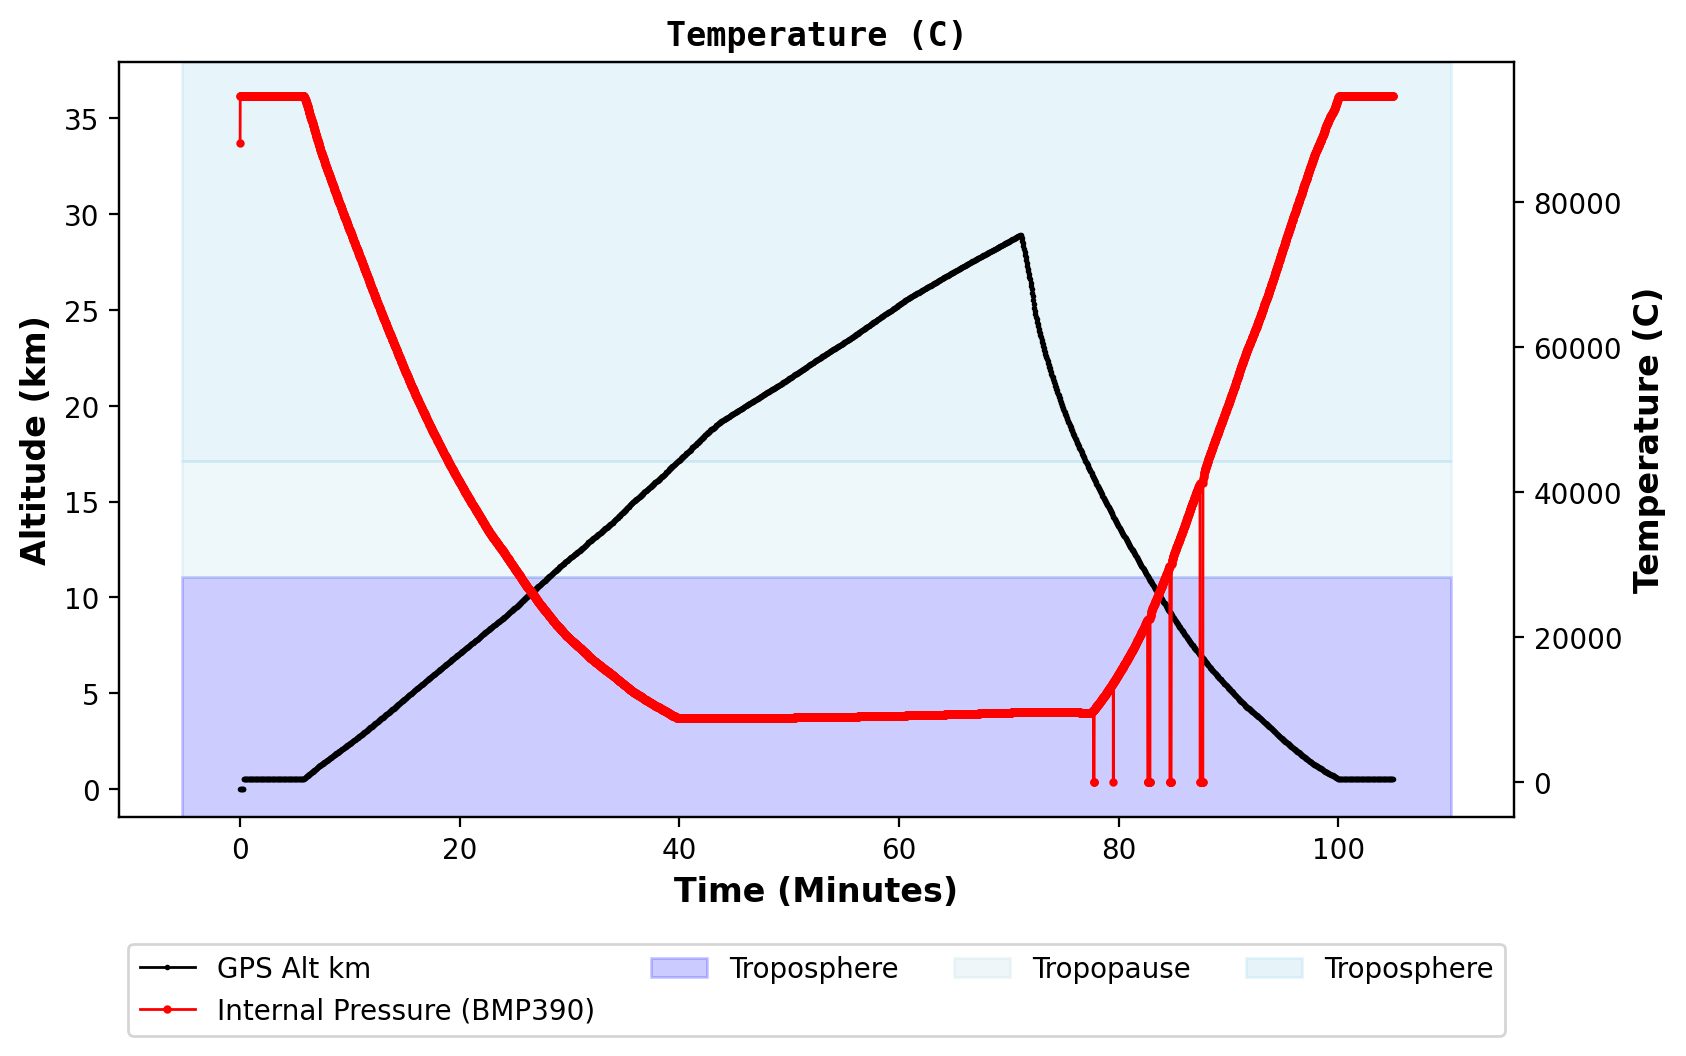

In [10]:
plotVsTimeWithAltOverlay(
        flash_df, 
        ("Temperature (C)", [
            (f"Internal Pressure (BMP390)", "BMP390 Pressure (Pa)", {"color": "red", **typical_config}),
        ])
    )

## Relative Humidity 

In [17]:
internal_sensors = [
    "SHTC3 Rel Hum (%)", 
    "SCD40 Rel Hum (%)"
]

external_sensors = [
    "SHTC3_O Rel_Hum_O (%)", 
    "SCD40_O Rel Hum_O (%)"
]

External Sensors


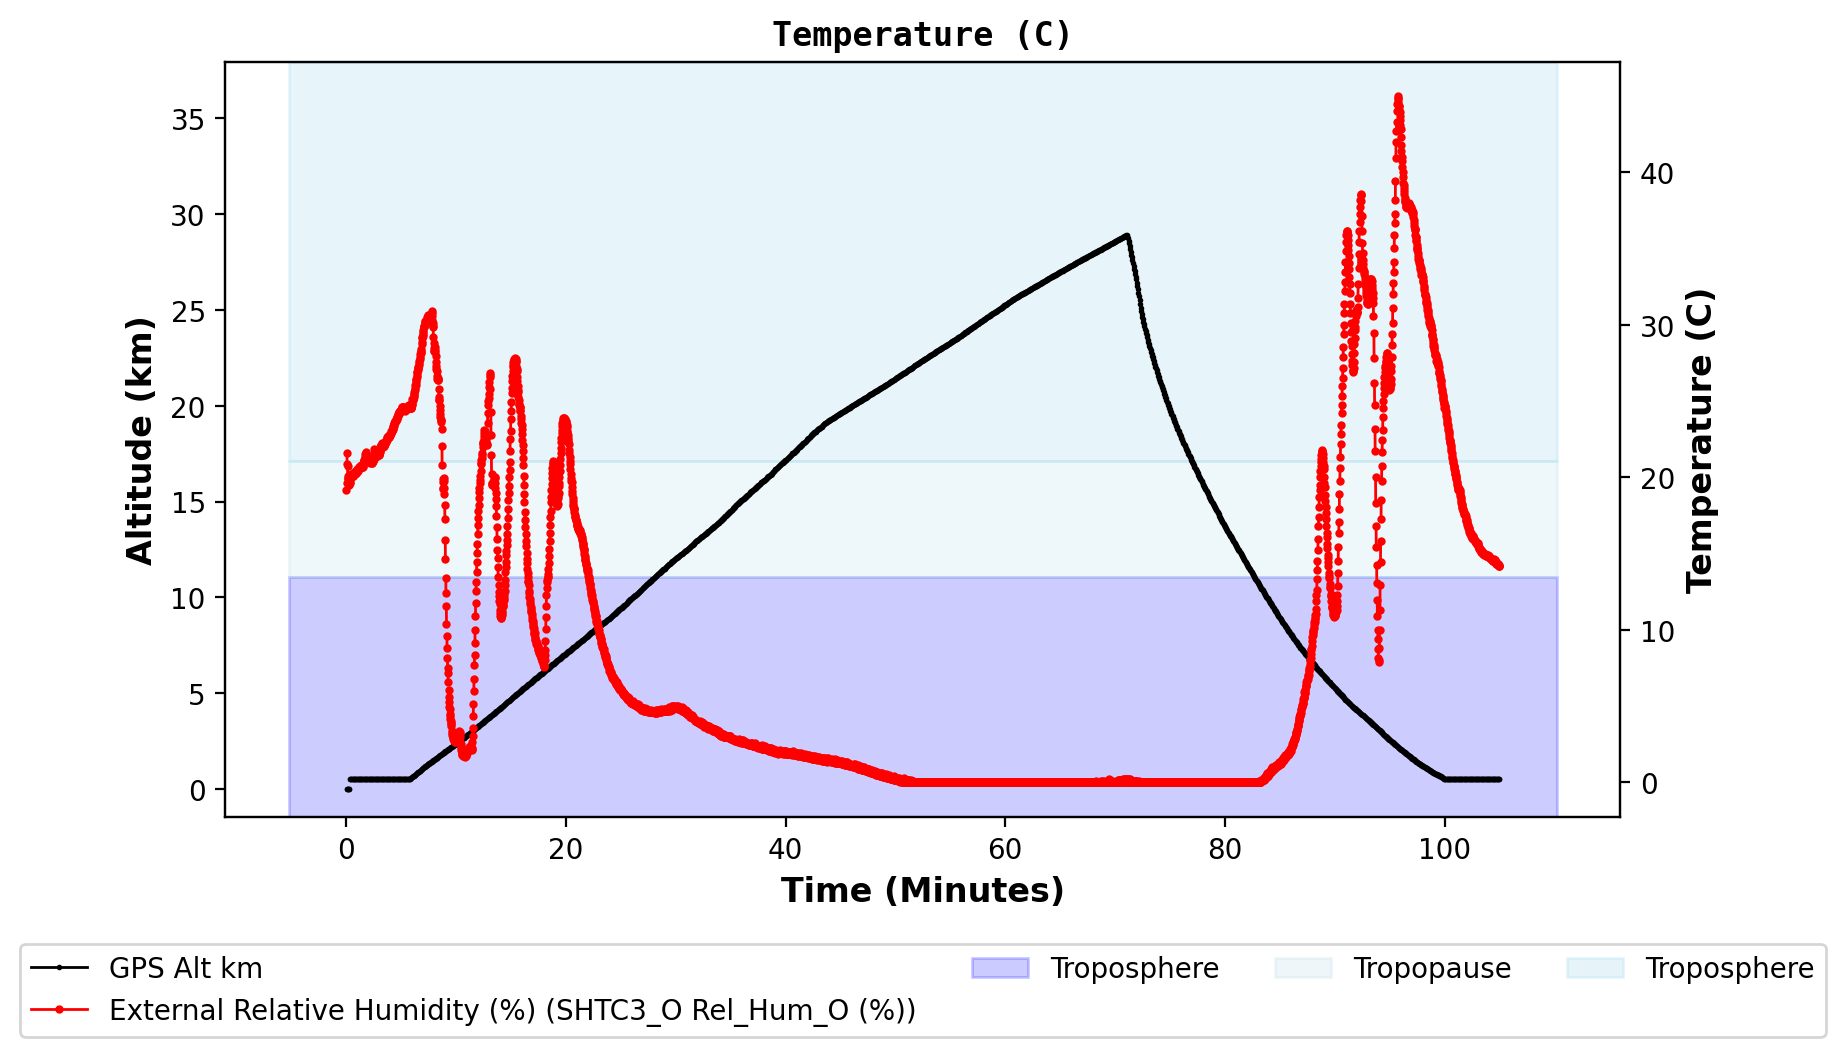

Min: 0.0 Max: 44.97999954223633


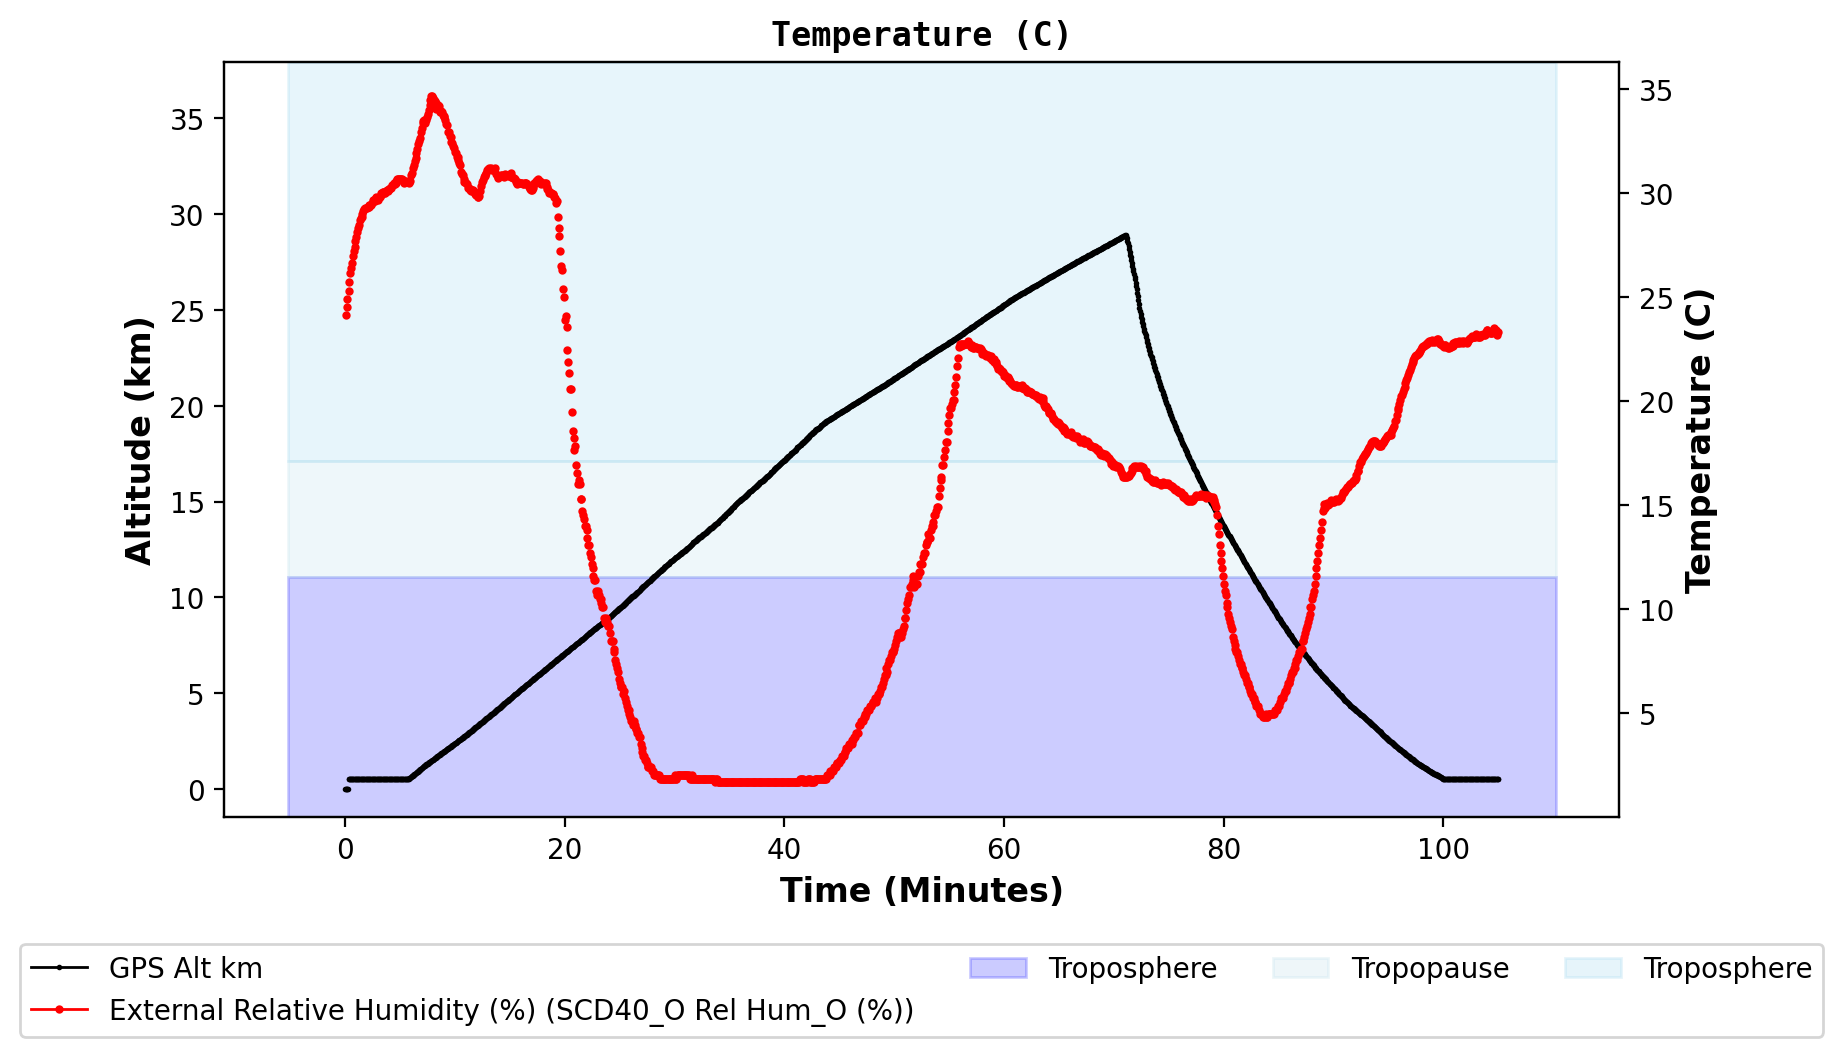

Min: 1.6556038856506348 Max: 34.67765426635742
Internal Sensors


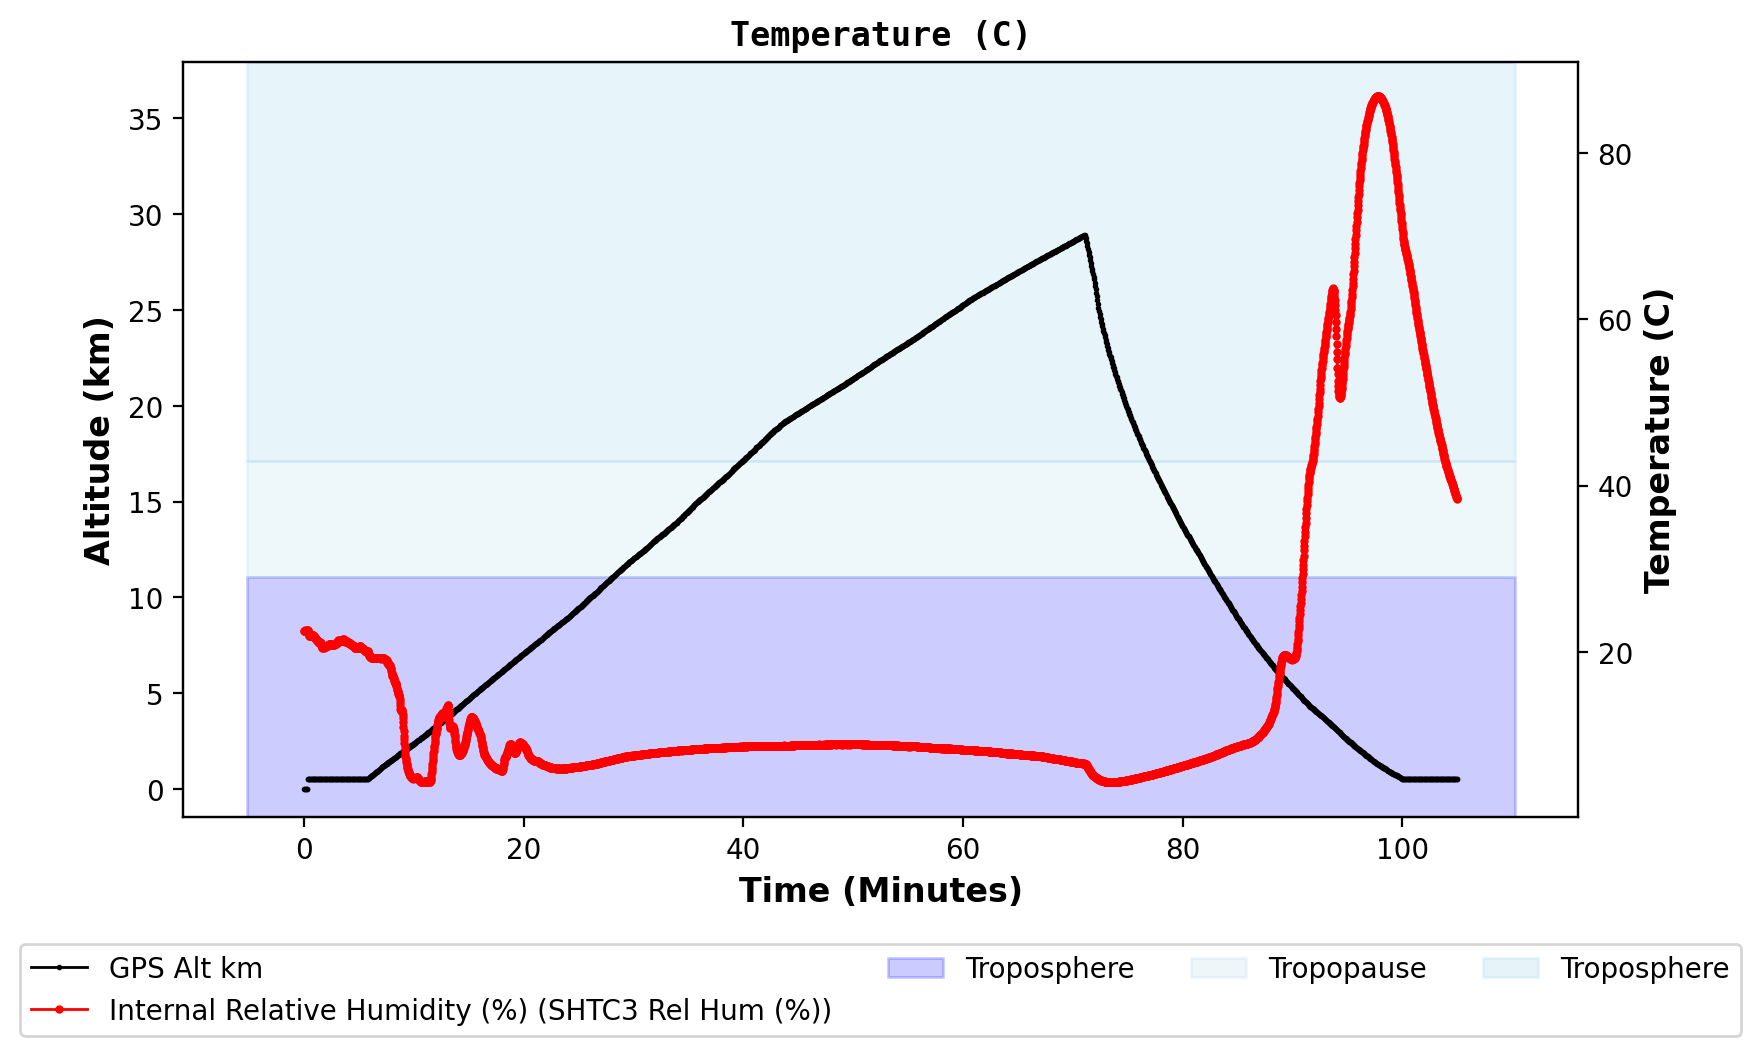

Min: 4.329999923706055 Max: 86.80000305175781


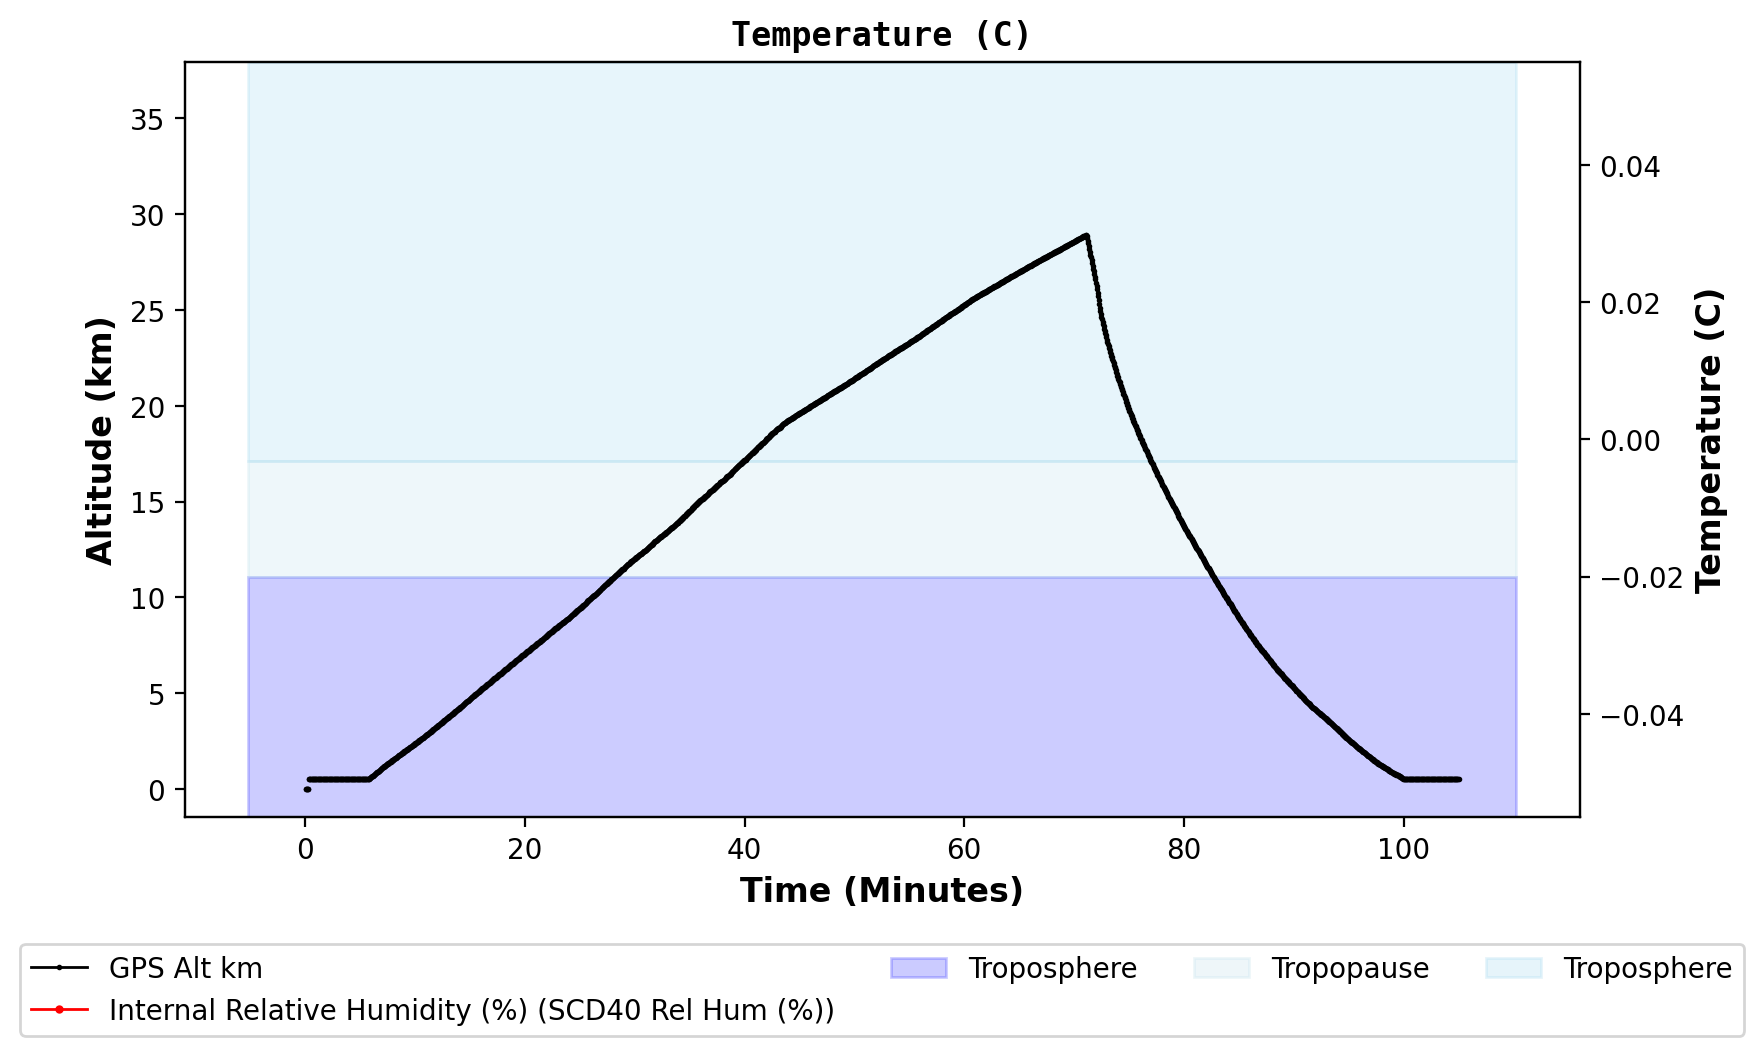

Min: nan Max: nan


In [18]:
print("External Sensors")
for temp in external_sensors: 
    plotVsTimeWithAltOverlay(
        flash_df, 
        ("Relative Humidity (%)", [
            (f"External Relative Humidity (%) ({temp})", temp, {"color": "red", **typical_config}),
        ])
    )
    print(f"Min: {flash_df[temp].min()} Max: {flash_df[temp].max()}")

print("Internal Sensors")
for temp in internal_sensors: 
    plotVsTimeWithAltOverlay(
        flash_df, 
        ("Relative Humidity (%)", [
            (f"Internal Relative Humidity (%) ({temp})", temp, {"color": "red", **typical_config}),
        ])
    )
    print(f"Min: {flash_df[temp].min()} Max: {flash_df[temp].max()}")
    

## CO2

External Sensors


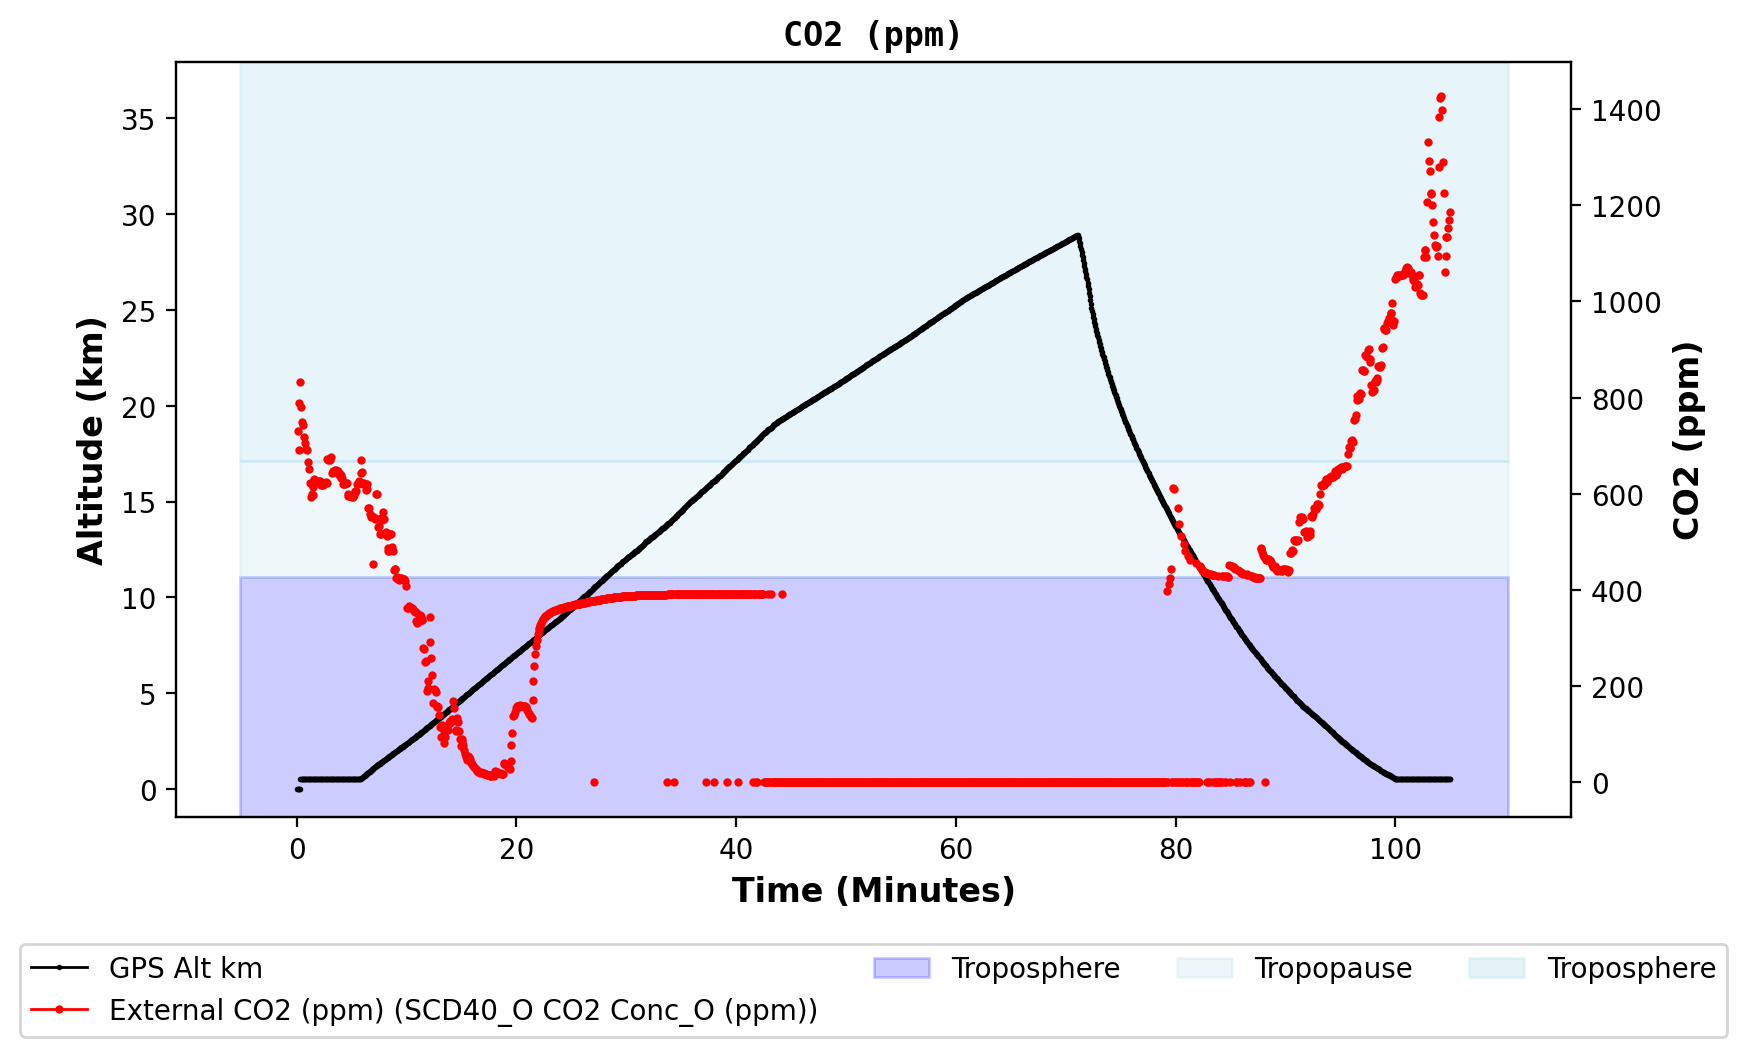

Min: 0.0 Max: 1427.0


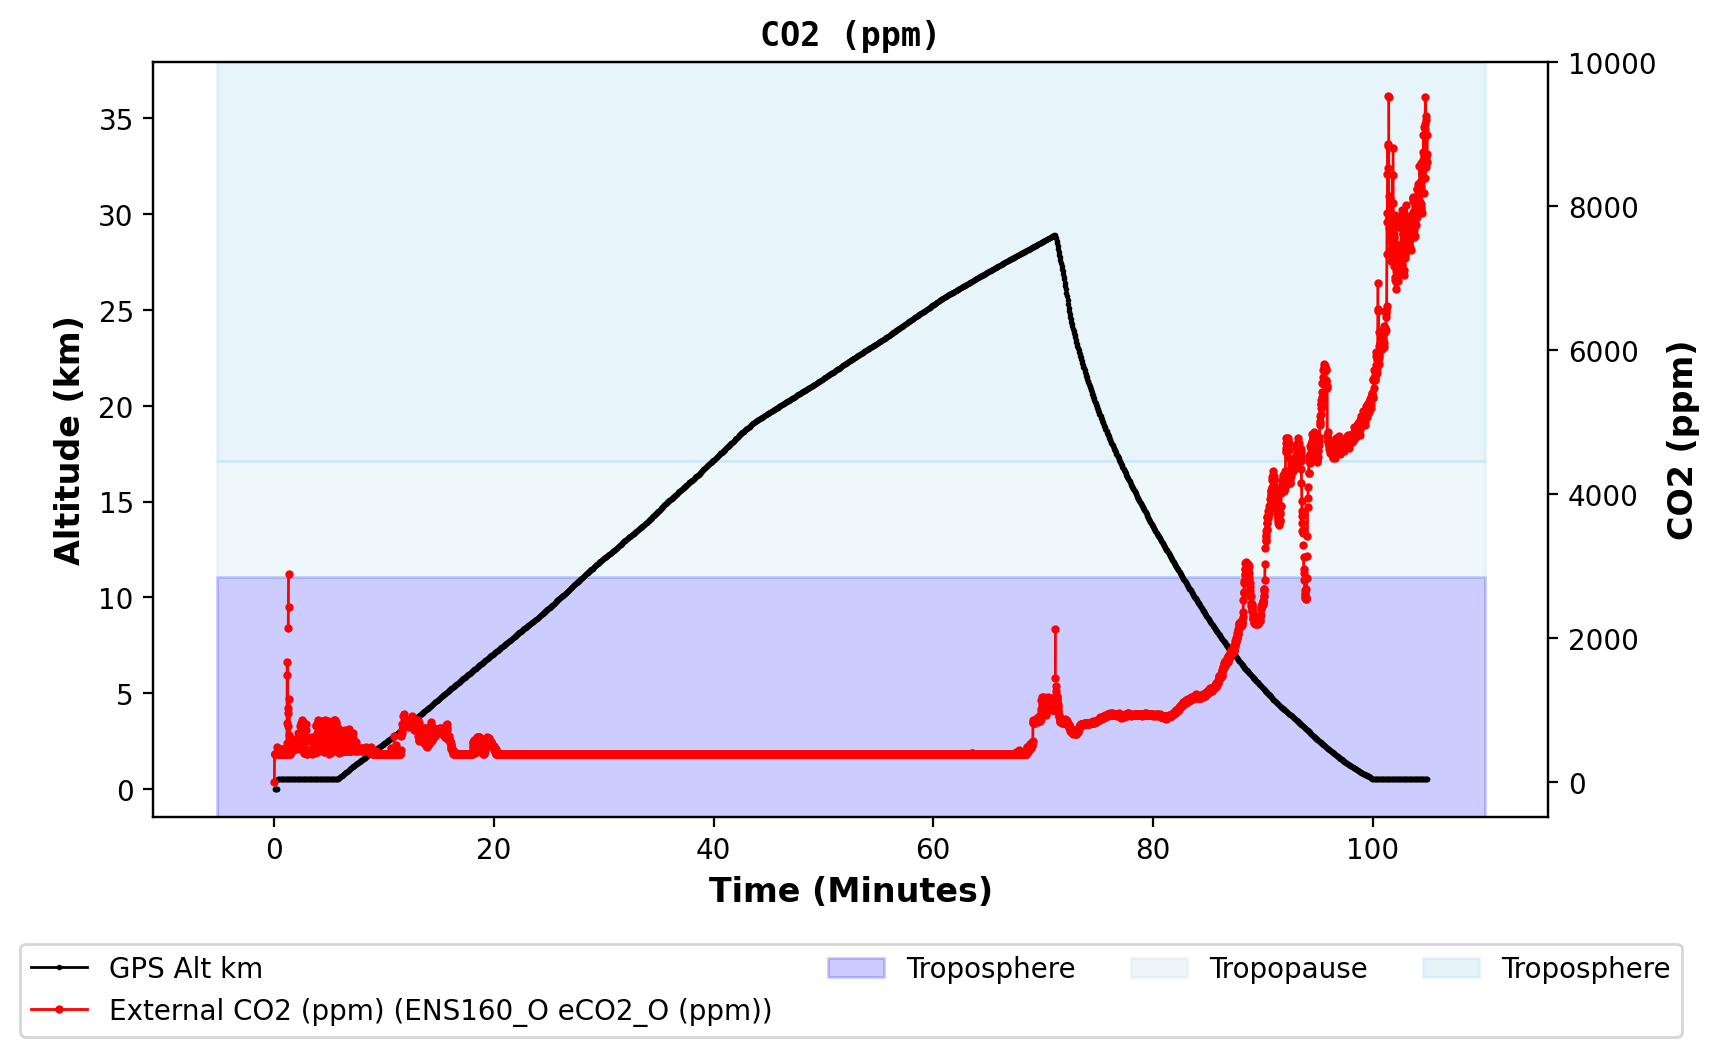

Min: 0.0 Max: 9532.0
Internal Sensors


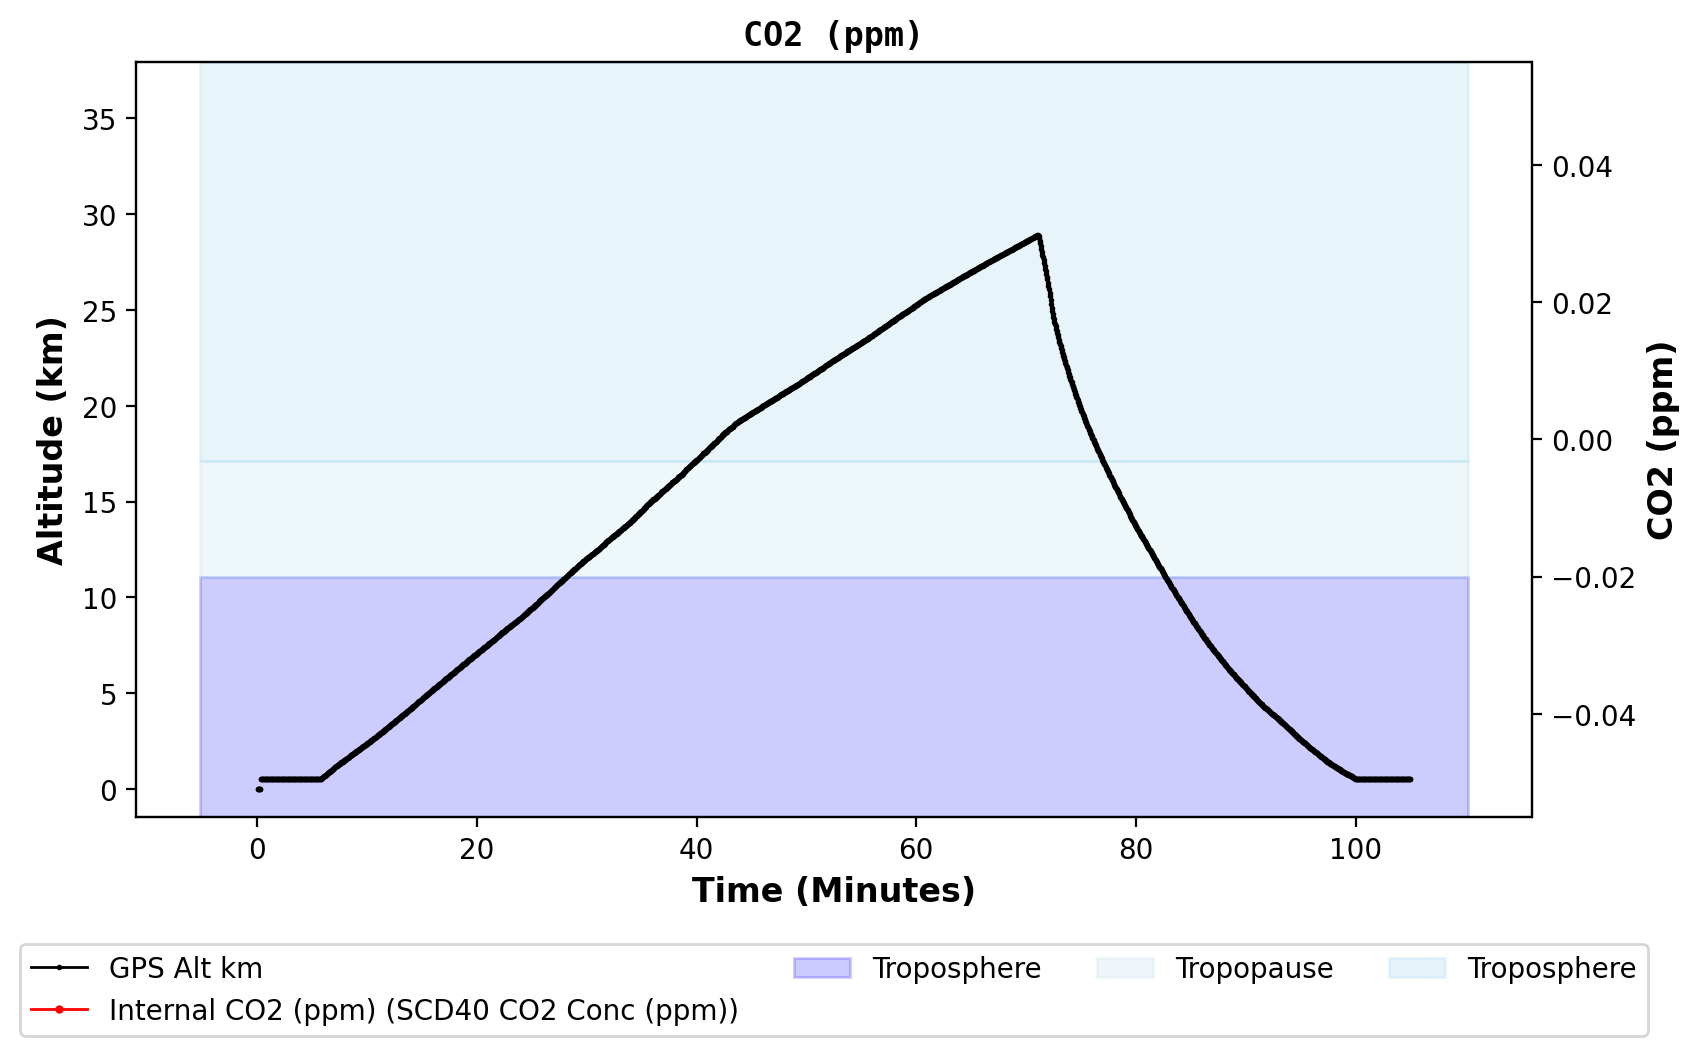

Min: nan Max: nan


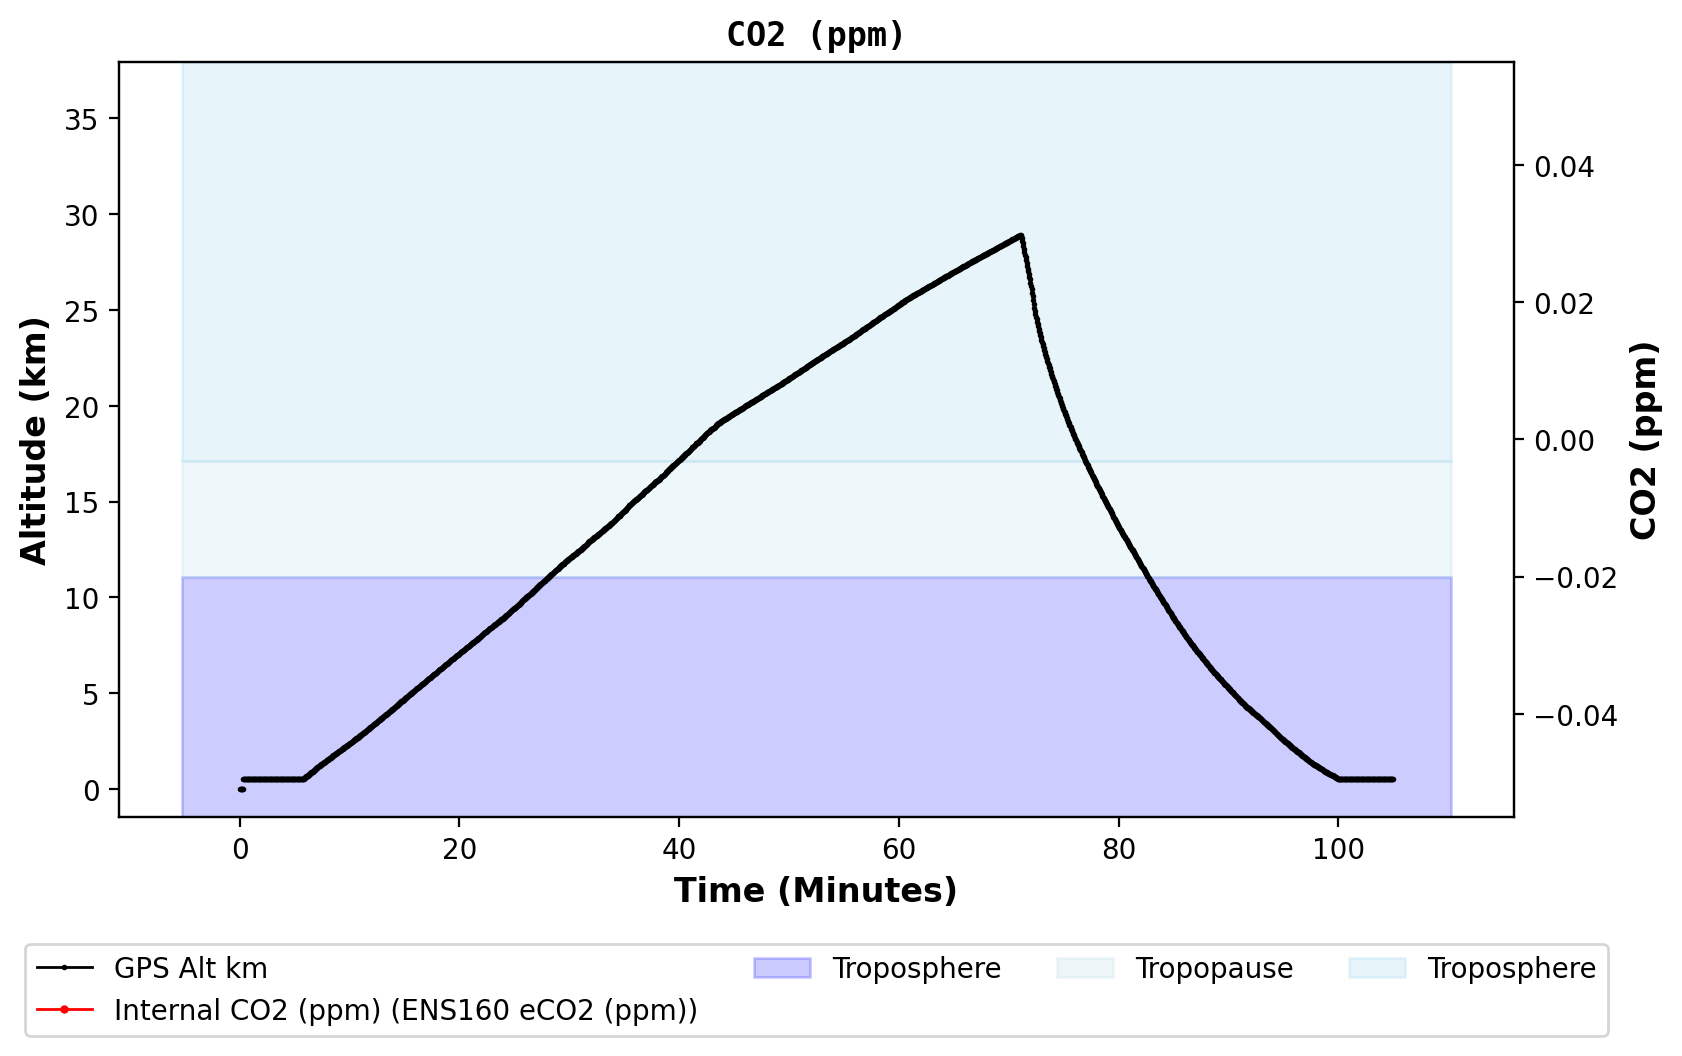

Min: nan Max: nan


In [20]:
internal_sensors = [
    "SCD40 CO2 Conc (ppm)",
    "ENS160 eCO2 (ppm)"
]

external_sensors = [
    "SCD40_O CO2 Conc_O (ppm)",
    "ENS160_O eCO2_O (ppm)"
]

print("External Sensors")
for temp in external_sensors: 
    plotVsTimeWithAltOverlay(
        flash_df, 
        ("CO2 (ppm)", [
            (f"External CO2 (ppm) ({temp})", temp, {"color": "red", **typical_config}),
        ])
    )
    print(f"Min: {flash_df[temp].min()} Max: {flash_df[temp].max()}")

print("Internal Sensors")
for temp in internal_sensors: 
    plotVsTimeWithAltOverlay(
        flash_df, 
        ("CO2 (ppm)", [
            (f"Internal CO2 (ppm) ({temp})", temp, {"color": "red", **typical_config}),
        ])
    )
    print(f"Min: {flash_df[temp].min()} Max: {flash_df[temp].max()}")
    